In [155]:
library(ggplot2)
options(repr.plot.height=4,repr.plot.width=6)

Cargar los datos en un dataframe llamado: airbnb

In [156]:
airbnb<-read.csv('data//airbnb.csv',sep = ',', stringsAsFactors = FALSE)

Mostrar las primeras 6 filas del dataframe

In [157]:
head(airbnb)

,Zipcode,Neighbourhood.Cleansed,Property.Type,Room.Type,Accommodates,Bathrooms,Bedrooms,Beds,Bed.Type,Amenities,Square.Feet,Price,Review.Scores.Rating
,<chr>,<chr>,<chr>,<chr>,<int>,<dbl>,<int>,<int>,<chr>,<chr>,<int>,<int>,<int>
1,28004,Universidad,Apartment,Private room,2,2,1,1,Real Bed,"TV,Wireless Internet,Kitchen,Pets allowed,Pets live on this property,Buzzer/wireless intercom,Heating,Suitable for events,Washer,First aid kit,Essentials,Lock on bedroom door,Iron",NA,35,NA
2,28004,Universidad,Apartment,Entire home/apt,6,1,3,5,Real Bed,"TV,Internet,Wireless Internet,Air conditioning,Kitchen,Indoor fireplace,Heating,Family/kid friendly,Washer,Dryer,Smoke detector,Carbon monoxide detector,Essentials,Shampoo",NA,92,96
3,28004,Universidad,Apartment,Entire home/apt,3,1,2,2,Real Bed,"TV,Internet,Wireless Internet,Air conditioning,Kitchen,Doorman,Heating,Family/kid friendly,Washer,Essentials,Shampoo,Hangers,Hair dryer,Iron,Laptop friendly workspace",NA,55,91
4,28004,Universidad,Loft,Entire home/apt,3,2,1,1,Real Bed,"TV,Internet,Wireless Internet,Air conditioning,Kitchen,Pets allowed,Breakfast,Elevator in building,Indoor fireplace,Buzzer/wireless intercom,Heating,Washer,Essentials,Shampoo,Hangers,Hair dryer,Iron,Laptop friendly workspace,translation missing: en.hosting_amenity_49,translation missing: en.hosting_amenity_50",NA,60,100
5,28015,Universidad,Apartment,Entire home/apt,5,1,1,1,Real Bed,"TV,Wireless Internet,Air conditioning,Kitchen,Smoking allowed,Pets allowed,Elevator in building,Heating,Family/kid friendly,Washer,Essentials,Iron",538,75,90
6,28004,Universidad,Apartment,Entire home/apt,2,1,0,1,Real Bed,"TV,Cable TV,Internet,Wireless Internet,Air conditioning,Wheelchair accessible,Kitchen,Doorman,Elevator in building,Buzzer/wireless intercom,Heating,Washer,Smoke detector,Carbon monoxide detector,First aid kit,Safety card,Fire extinguisher,Essentials,Shampoo,24-hour check-in,Hangers,Hair dryer,Iron,Laptop friendly workspace,Self Check-In,Doorman Entry",NA,55,95


Renombrar las columnas de la siguiente forma:

| Nombre original | Nuevo nombre |
| - | - |
| Zipcode | CodigoPostal |
| Neighbourhood.Cleansed | Barrio |
| Property.Type	| TipoPropiedad |
| Room.Type | TipoAlquiler |
| Accommodates | MaxOcupantes |
| Bathrooms	| NumBanyos |
| Bedrooms	| NumDormitorios |
| Beds	|  NumCamas |
| Bed.Type	| TipoCama |
| Amenities | Comodidades |
| Square.Feet | PiesCuadrados |
| Price	| Precio |
| Review.Scores.Rating | Puntuacion |

In [158]:
newnames<-c("CodigoPostal","Barrio","TipoPropiedad","TipoAlquiler","MaxOcupantes","NumBanyos",
"NumDormitorios","NumCamas","TipoCama","Comodidades","PiesCuadrados","Precio","Puntuacion")

airbnb_new <- airbnb
colnames(airbnb_new) <- newnames
head(airbnb_new)

,CodigoPostal,Barrio,TipoPropiedad,TipoAlquiler,MaxOcupantes,NumBanyos,NumDormitorios,NumCamas,TipoCama,Comodidades,PiesCuadrados,Precio,Puntuacion
,<chr>,<chr>,<chr>,<chr>,<int>,<dbl>,<int>,<int>,<chr>,<chr>,<int>,<int>,<int>
1,28004,Universidad,Apartment,Private room,2,2,1,1,Real Bed,"TV,Wireless Internet,Kitchen,Pets allowed,Pets live on this property,Buzzer/wireless intercom,Heating,Suitable for events,Washer,First aid kit,Essentials,Lock on bedroom door,Iron",NA,35,NA
2,28004,Universidad,Apartment,Entire home/apt,6,1,3,5,Real Bed,"TV,Internet,Wireless Internet,Air conditioning,Kitchen,Indoor fireplace,Heating,Family/kid friendly,Washer,Dryer,Smoke detector,Carbon monoxide detector,Essentials,Shampoo",NA,92,96
3,28004,Universidad,Apartment,Entire home/apt,3,1,2,2,Real Bed,"TV,Internet,Wireless Internet,Air conditioning,Kitchen,Doorman,Heating,Family/kid friendly,Washer,Essentials,Shampoo,Hangers,Hair dryer,Iron,Laptop friendly workspace",NA,55,91
4,28004,Universidad,Loft,Entire home/apt,3,2,1,1,Real Bed,"TV,Internet,Wireless Internet,Air conditioning,Kitchen,Pets allowed,Breakfast,Elevator in building,Indoor fireplace,Buzzer/wireless intercom,Heating,Washer,Essentials,Shampoo,Hangers,Hair dryer,Iron,Laptop friendly workspace,translation missing: en.hosting_amenity_49,translation missing: en.hosting_amenity_50",NA,60,100
5,28015,Universidad,Apartment,Entire home/apt,5,1,1,1,Real Bed,"TV,Wireless Internet,Air conditioning,Kitchen,Smoking allowed,Pets allowed,Elevator in building,Heating,Family/kid friendly,Washer,Essentials,Iron",538,75,90
6,28004,Universidad,Apartment,Entire home/apt,2,1,0,1,Real Bed,"TV,Cable TV,Internet,Wireless Internet,Air conditioning,Wheelchair accessible,Kitchen,Doorman,Elevator in building,Buzzer/wireless intercom,Heating,Washer,Smoke detector,Carbon monoxide detector,First aid kit,Safety card,Fire extinguisher,Essentials,Shampoo,24-hour check-in,Hangers,Hair dryer,Iron,Laptop friendly workspace,Self Check-In,Doorman Entry",NA,55,95


Crea una nueva columna llamada MetrosCuadrados a partir de la columna PiesCuadrados.

Ayuda: 1 pie cuadrado son 0,092903 metros cuadrdados

In [159]:
airbnb_new$MetrosCuadrados <- airbnb_new$PiesCuadrados * 0.092903
head(airbnb_new)

,CodigoPostal,Barrio,TipoPropiedad,TipoAlquiler,MaxOcupantes,NumBanyos,NumDormitorios,NumCamas,TipoCama,Comodidades,PiesCuadrados,Precio,Puntuacion,MetrosCuadrados
,<chr>,<chr>,<chr>,<chr>,<int>,<dbl>,<int>,<int>,<chr>,<chr>,<int>,<int>,<int>,<dbl>
1,28004,Universidad,Apartment,Private room,2,2,1,1,Real Bed,"TV,Wireless Internet,Kitchen,Pets allowed,Pets live on this property,Buzzer/wireless intercom,Heating,Suitable for events,Washer,First aid kit,Essentials,Lock on bedroom door,Iron",NA,35,NA,NA
2,28004,Universidad,Apartment,Entire home/apt,6,1,3,5,Real Bed,"TV,Internet,Wireless Internet,Air conditioning,Kitchen,Indoor fireplace,Heating,Family/kid friendly,Washer,Dryer,Smoke detector,Carbon monoxide detector,Essentials,Shampoo",NA,92,96,NA
3,28004,Universidad,Apartment,Entire home/apt,3,1,2,2,Real Bed,"TV,Internet,Wireless Internet,Air conditioning,Kitchen,Doorman,Heating,Family/kid friendly,Washer,Essentials,Shampoo,Hangers,Hair dryer,Iron,Laptop friendly workspace",NA,55,91,NA
4,28004,Universidad,Loft,Entire home/apt,3,2,1,1,Real Bed,"TV,Internet,Wireless Internet,Air conditioning,Kitchen,Pets allowed,Breakfast,Elevator in building,Indoor fireplace,Buzzer/wireless intercom,Heating,Washer,Essentials,Shampoo,Hangers,Hair dryer,Iron,Laptop friendly workspace,translation missing: en.hosting_amenity_49,translation missing: en.hosting_amenity_50",NA,60,100,NA
5,28015,Universidad,Apartment,Entire home/apt,5,1,1,1,Real Bed,"TV,Wireless Internet,Air conditioning,Kitchen,Smoking allowed,Pets allowed,Elevator in building,Heating,Family/kid friendly,Washer,Essentials,Iron",538,75,90,49.98181
6,28004,Universidad,Apartment,Entire home/apt,2,1,0,1,Real Bed,"TV,Cable TV,Internet,Wireless Internet,Air conditioning,Wheelchair accessible,Kitchen,Doorman,Elevator in building,Buzzer/wireless intercom,Heating,Washer,Smoke detector,Carbon monoxide detector,First aid kit,Safety card,Fire extinguisher,Essentials,Shampoo,24-hour check-in,Hangers,Hair dryer,Iron,Laptop friendly workspace,Self Check-In,Doorman Entry",NA,55,95,NA


Miremos el código postal. Es una variable con entradas erroneas.
Hay valores como '', '-'  y '28' que deberían ser considerados como NA.
Así mismo también debería ser NA todos los que no compiencen por 28, ya que estamos con códigos postales de Madrid

El código postal 28002, 28004 y 28051 tienen entradas repetidas. 
Por ejemplo las entradas 28002\n20882 deberían ir dnetro de 28002

El codigo 2804 debería ser 28004, 2805 deberia ser 28005 y 2815 juncto con 2815 debería ser 28015

Limpia los datos de la columna Codigo Postal

In [160]:
airbnb_new[which(airbnb_new$CodigoPostal == ''), 'CodigoPostal'] <- NA
airbnb_new[which(airbnb_new$CodigoPostal == '-'), 'CodigoPostal'] <- NA
airbnb_new[which(airbnb_new$CodigoPostal == '28'), 'CodigoPostal'] <- NA
airbnb_new[which(airbnb_new$CodigoPostal == '20013'), 'CodigoPostal'] <- NA
airbnb_new[which(airbnb_new$CodigoPostal == '20126'), 'CodigoPostal'] <- NA
airbnb_new[which(airbnb_new$CodigoPostal == '25008'), 'CodigoPostal'] <- NA
airbnb_new[which(airbnb_new$CodigoPostal == '27004'), 'CodigoPostal'] <- NA
airbnb_new[which(airbnb_new$CodigoPostal == '27013'), 'CodigoPostal'] <- NA
airbnb_new[which(airbnb_new$CodigoPostal == '28002\n28002'), 'CodigoPostal'] <- '28002'
airbnb_new[which(airbnb_new$CodigoPostal == '28051\n28051'), 'CodigoPostal'] <- '28051'
airbnb_new[which(airbnb_new$CodigoPostal == 'Madrid 28004'), 'CodigoPostal'] <- '28004'
airbnb_new[which(airbnb_new$CodigoPostal == '2804'), 'CodigoPostal'] <- '28004'
airbnb_new[which(airbnb_new$CodigoPostal == '2805'), 'CodigoPostal'] <- '28005'
airbnb_new[which(airbnb_new$CodigoPostal == '2015'), 'CodigoPostal'] <- '28015'
airbnb_new[which(airbnb_new$CodigoPostal == '2815'), 'CodigoPostal'] <- '28015'
airbnb_new[which(airbnb_new$CodigoPostal == '280013'), 'CodigoPostal'] <- '28013'
airbnb_limpio <- airbnb_new

Una vez limpios los datos ¿Cuales son los códigos postales que tenemos? 

In [161]:
sort(unique(airbnb_limpio$CodigoPostal), decreasing = FALSE)

[1] "28001" "28002" "28003" "28004" "28005" "28006" "28007" "28008" "28009"
[10] "28010" "28011" "28012" "28013" "28014" "28015" "28016" "28017" "28018"
[19] "28019" "28020" "28021" "28022" "28023" "28024" "28025" "28026" "28027"
[28] "28028" "28029" "28030" "28031" "28032" "28033" "28034" "28035" "28036"
[37] "28037" "28038" "28039" "28040" "28041" "28042" "28043" "28044" "28045"
[46] "28046" "28047" "28048" "28049" "28050" "28051" "28052" "28053" "28054"
[55] "28055" "28056" "28058" "28060" "28094" "28105" "28850"

¿Cuales son los 5 códigos postales con más entradas? ¿Y con menos? ¿Cuantas entradas tienen?

In [162]:
cpMasEntradas <- sort(table(na.omit(airbnb_limpio$CodigoPostal)), decreasing = TRUE)[1:5]
print("Código Postales con más entradas")
cpMasEntradas
cpMenosEntradas <- sort(table(airbnb_limpio$CodigoPostal))[1:5]
print("Código Postales con menos entradas")
cpMenosEntradas

[1] "Código Postales con más entradas"



28012 28004 28005 28013 28014 
 2060  1796  1195  1020   630 

[1] "Código Postales con menos entradas"



28048 28052 28056 28058 28060 
    1     1     1     1     1 

¿Cuales son los barrios que hay en el código postal 28012?

In [163]:
unique(na.omit(airbnb_limpio[airbnb_limpio$CodigoPostal == '28012', 'Barrio']))

[1] "Sol"             "Acacias"         "Palos de Moguer" "Embajadores"    
 [5] "Cortes"          "Palacio"         "Universidad"     "Delicias"       
 [9] "Arapiles"        "Atocha"          "Goya"

¿Cuantas entradas hay en cada uno de esos barrios para el codigo postal 28012?

In [164]:
table(na.omit(airbnb_limpio[airbnb_limpio$CodigoPostal == '28012', 'Barrio']))


        Acacias        Arapiles          Atocha          Cortes        Delicias 
             13               1               1             216               1 
    Embajadores            Goya         Palacio Palos de Moguer             Sol 
           1449               1              27              46             301 
    Universidad 
              4 

¿Cuantos barrios hay en todo el dataset airbnb? ¿Cuales son?

In [165]:
barrios <- unique(airbnb_limpio$Barrio)
paste("El número de barrios es: ", length(barrios))
barrios

[1] "El número de barrios es:  125"

[1] "Universidad"                  "Sol"                         
  [3] "Imperial"                     "Acacias"                     
  [5] "Chopera"                      "Delicias"                    
  [7] "Palos de Moguer"              "Embajadores"                 
  [9] "Cortes"                       "Atocha"                      
 [11] "Pacífico"                     "Adelfas"                     
 [13] "Estrella"                     "Ibiza"                       
 [15] "Jerónimos"                    "Niño Jesús"                  
 [17] "Palacio"                      "Justicia"                    
 [19] "Recoletos"                    "Goya"                        
 [21] "Fuente del Berro"             "Arapiles"                    
 [23] "Trafalgar"                    "Almagro"                     
 [25] "Guindalera"                   "Lista"                       
 [27] "Castellana"                   "El Viso"                     
 [29] "Prosperidad"                  "Valverde"                    
 [31] "Casa de Campo"                "El Goloso"                   
 [33] "Numancia"                     "Cármenes"                    
 [35] "Puerta del Angel"             "Lucero"                      
 [37] "Aluche"                       "San Isidro"                  
 [39] "Campamento"                   "Comillas"                    
 [41] "Opañel"                       "Vista Alegre"                
 [43] "Ciudad Jardín"                "Hispanoamérica"              
 [45] "Nueva España"                 "Castilla"                    
 [47] "Bellas Vistas"                "Cuatro Caminos"              
 [49] "Castillejos"                  "Vallehermoso"                
 [51] "Almenara"                     "Valdeacederas"               
 [53] "Berruguete"                   "Gaztambide"                  
 [55] "Rios Rosas"                   "Peñagrande"                  
 [57] "Argüelles"                    "Puerta Bonita"               
 [59] "Buenavista"                   "Abrantes"                    
 [61] "Orcasur"                      "San Fermín"                  
 [63] "Almendrales"                  "Pradolongo"                  
 [65] "Portazgo"                     "Entrevías"                   
 [67] "San Diego"                    "Palomeras Bajas"             
 [69] "Fontarrón"                    "Vinateros"                   
 [71] "Ventas"                       "Pueblo Nuevo"                
 [73] "Quintana"                     "Concepción"                  
 [75] "San Juan Bautista"            "Costillares"                 
 [77] "Piovera"                      "Canillas"                    
 [79] "Pinar del Rey"                "Apostol Santiago"            
 [81] "San Andrés"                   "Valdefuentes"                
 [83] "Butarque"                     "Los Angeles"                 
 [85] "Casco Histórico de Vicálvaro" "Simancas"                    
 [87] "Rejas"                        "Salvador"                    
 [89] "Casco Histórico de Barajas"   "Pilar"                       
 [91] "La Paz"                       "Mirasierra"                  
 [93] "Ciudad Universitaria"         "Moscardó"                    
 [95] "Palomeras Sureste"            "Marroquina"                  
 [97] "Media Legua"                  "Los Rosales"                 
 [99] "Casco Histórico de Vallecas"  "Timón"                       
[101] "Corralejos"                   "Cuatro Vientos"              
[103] "Colina"                       "San Cristobal"               
[105] "Alameda de Osuna"             "Aeropuerto"                  
[107] "Palomas"                      "Zofío"                       
[109] "Aguilas"                      "Legazpi"                     
[111] "Fuentelareina"                "Aravaca"                     
[113] "Ambroz"                       "Canillejas"                  
[115] "Valdezarza"                   "Amposta"                     
[117] "San Pascual"                  "Santa Eugenia"      

¿Cuales son los 5 barrios que tienen mayor número entradas?

In [166]:
tbl <- table(airbnb_limpio$Barrio)
sort(tbl, decreasing = TRUE)[1:5]


Embajadores Universidad     Palacio         Sol    Justicia 
       1844        1358        1083         940         785 

¿Cuantos Tipos de Alquiler diferentes hay? ¿Cuales son? ¿Cuantas entradas en el dataframe hay por cada tipo?

In [167]:
paste("Número de tipos de alquileres: ", length(unique(airbnb_limpio$TipoAlquiler)))
unique(airbnb_limpio$TipoAlquiler)
table(airbnb_limpio$TipoAlquiler)

[1] "Número de tipos de alquileres:  3"

[1] "Private room"    "Entire home/apt" "Shared room"


Entire home/apt    Private room     Shared room 
           7903            5113             191 

Muestra el diagrama de cajas del precio para cada uno de los diferentes Tipos de Alquiler

Warning message:
“Removed 9 rows containing non-finite values (stat_boxplot).”


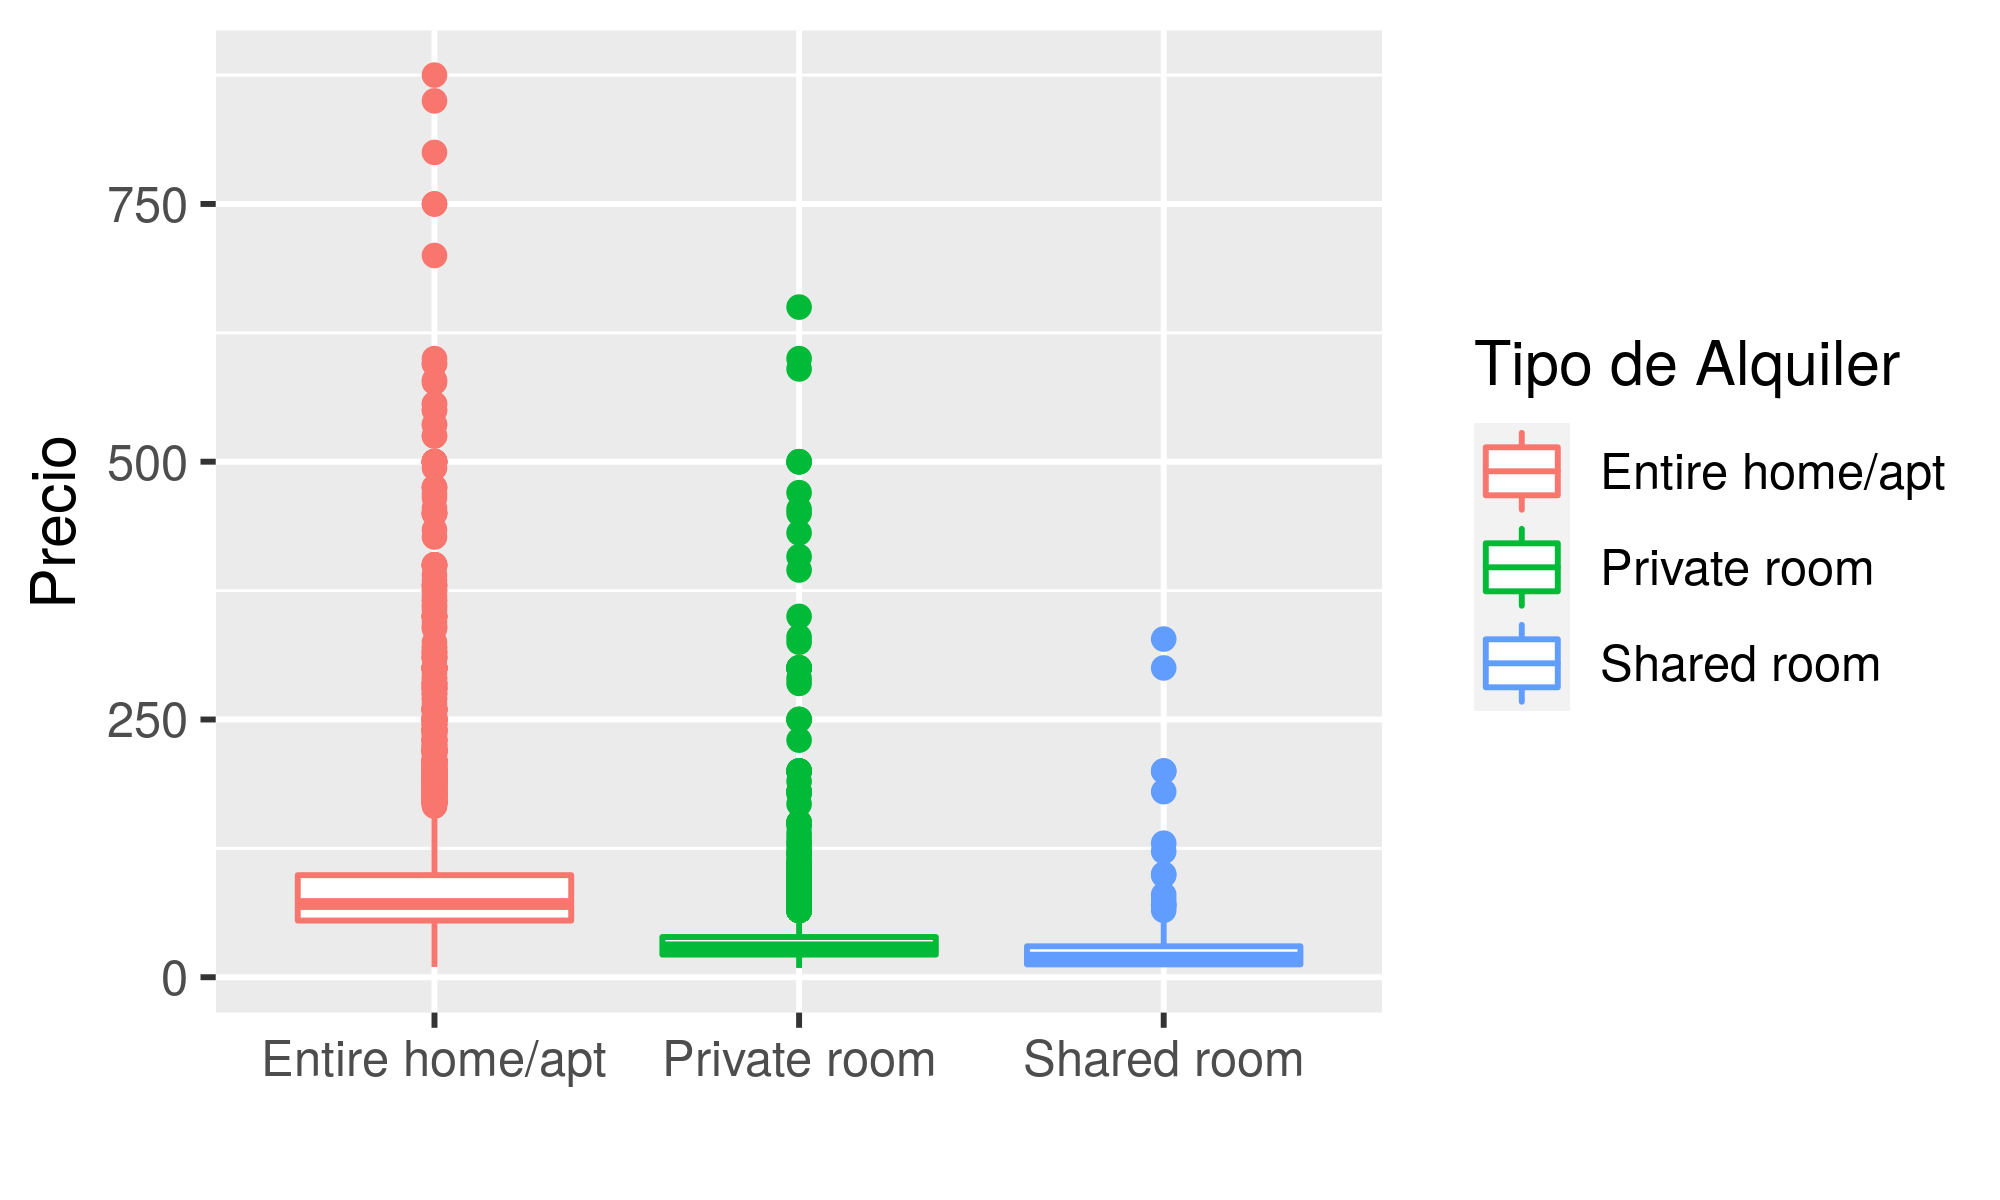

In [168]:
library("ggplot2")
options(repr.plot.height=3,repr.plot.width=5 , repr.plot.res = 400)
ggplot(data=airbnb_limpio, aes(x=TipoAlquiler, y=Precio, color=TipoAlquiler))+geom_boxplot()+ 
scale_color_discrete(name="Tipo de Alquiler")+ylab('Precio')+xlab('')

Cual es el precio medio de alquiler de cada uno, la diferencia que hay ¿es estadísticamente significativa?
¿Con que test lo comprobarías?

In [169]:
mean_casa <- na.omit(airbnb_limpio[airbnb_limpio$TipoAlquiler == 'Entire home/apt', 'Precio'])
m_casa <- mean(mean_casa)
paste("Precio medio de alquiler para casas: ", round(m_casa,2))

mean_private <- na.omit(airbnb_limpio[airbnb_limpio$TipoAlquiler == 'Private room', 'Precio'])
m_private <- mean(mean_private)
paste("Precio medio de alquiler para habitaciones privadas: ", round(m_private,2))

mean_shared <- na.omit(airbnb_limpio[airbnb_limpio$TipoAlquiler == 'Shared room', 'Precio'])
m_shared <- mean(mean_shared)
paste("Precio medio de alquiler para habitaciones compartidas: ", round(m_shared,2))


paste("Comprobamos si las medias son estadísticamente significativas: Utilizaremos el Test de Turkey")

df <- rbind(data.frame(value=mean_casa,cl="1"),data.frame(value=mean_private,cl="2"),data.frame(value=mean_shared,cl="3"))
df$cl <- as.factor(df$cl)
#head(df)
#str(df)

kruskal.test( value ~ cl, data=df)
paste("Segun los resultados existe una diferencia estadisticamente significativa.")



[1] "Precio medio de alquiler para casas:  87.3"

[1] "Precio medio de alquiler para habitaciones privadas:  34.26"

[1] "Precio medio de alquiler para habitaciones compartidas:  29.85"

[1] "Comprobamos si las medias son estadísticamente significativas: Utilizaremos el Test de Turkey"


	Kruskal-Wallis rank sum test

data:  value by cl
Kruskal-Wallis chi-squared = 7235.6, df = 2, p-value < 2.2e-16


[1] "Segun los resultados existe una diferencia estadisticamente significativa."

Filtra el dataframe cuyos tipo de alquiler sea  'Entire home/apt' y guardalo en un dataframe llamado 
*airbnb_entire*.
Estas serán las entradas que tienen un alquiler del piso completo.

In [170]:
airbnb_entire <- airbnb_limpio[airbnb_limpio$TipoAlquiler == "Entire home/apt",]
tail(airbnb_entire)

,CodigoPostal,Barrio,TipoPropiedad,TipoAlquiler,MaxOcupantes,NumBanyos,NumDormitorios,NumCamas,TipoCama,Comodidades,PiesCuadrados,Precio,Puntuacion,MetrosCuadrados
,<chr>,<chr>,<chr>,<chr>,<int>,<dbl>,<int>,<int>,<chr>,<chr>,<int>,<int>,<int>,<dbl>
13202,28004,Universidad,Apartment,Entire home/apt,4,1,1,2,Real Bed,"TV,Wireless Internet,Air conditioning,Kitchen,Smoking allowed,Pets allowed,Heating,Family/kid friendly,Washer,Fire extinguisher,Essentials,Lock on bedroom door,Hangers,Hair dryer,Iron",NA,48,83,NA
13203,28015,Universidad,Apartment,Entire home/apt,2,1,1,1,Real Bed,"TV,Internet,Wireless Internet,Air conditioning,Kitchen,Elevator in building,Buzzer/wireless intercom,Heating,Washer,Dryer,Smoke detector,Fire extinguisher,Essentials,Shampoo,Hangers,Hair dryer,Iron,Laptop friendly workspace,translation missing: en.hosting_amenity_49,translation missing: en.hosting_amenity_50",NA,35,90,NA
13204,28004,Universidad,Apartment,Entire home/apt,3,1,1,2,Real Bed,"TV,Wireless Internet,Air conditioning,Kitchen,Elevator in building,Buzzer/wireless intercom,Heating,Family/kid friendly,Washer,Dryer,Smoke detector,Carbon monoxide detector,Fire extinguisher,Essentials,Shampoo,24-hour check-in,Hangers,Hair dryer,Iron,Laptop friendly workspace",NA,79,97,NA
13205,28013,Universidad,Apartment,Entire home/apt,4,1,1,1,Real Bed,"TV,Wireless Internet,Air conditioning,Pool,Kitchen,Doorman,Gym,Elevator in building,Buzzer/wireless intercom,Heating,Washer,First aid kit,Safety card,Essentials,Shampoo,Hangers,Hair dryer,Iron,Laptop friendly workspace",NA,150,100,NA
13206,28004,Universidad,Loft,Entire home/apt,2,1,0,1,Real Bed,"TV,Internet,Wireless Internet,Kitchen,Smoking allowed,Pets allowed,Elevator in building,Heating,Family/kid friendly,Washer,First aid kit,Essentials,Shampoo",NA,80,91,NA
13207,28004,Universidad,Apartment,Entire home/apt,3,1,0,2,Real Bed,"TV,Internet,Wireless Internet,Air conditioning,Kitchen,Heating,Family/kid friendly,Washer",NA,69,80,NA


¿Cuales son los 5 barrios que tienen un mayor número de apartamentos enteros en alquiler?
Nota: Mirar solo en airbnb_entire. A partir de este punto y hasta que se diga lo contrario partiremos de airbnb_entire.

In [171]:
barrios_apartamentos <- airbnb_entire[airbnb_entire$TipoPropiedad == 'Apartment',]
sort(table(barrios_apartamentos$Barrio), decreasing = TRUE)[1:5]


Embajadores Universidad     Palacio         Sol      Cortes 
       1099         897         684         648         528 

¿Cuales son los 5 barrios que tienen un mayor precio medio de alquiler para apartamentos enteros (es decir, del dataframe airbnb_entire)?

¿Cual es su precio medio?

Ayuda: Usa la función aggregate `aggregate(.~colname,df,mean,na.rm=TRUE)`

In [172]:
mean_price <- aggregate(Precio ~ Barrio, barrios_apartamentos, mean, na.rm=TRUE)
mean_price <- mean_price[order(mean_price$Precio, decreasing = TRUE), ]
mean_price[1:5, ]

,Barrio,Precio
,<chr>,<dbl>
75,Palomas,459.5000
48,Fuentelareina,280.0000
90,Recoletos,165.5328
26,Casco Histórico de Barajas,157.0000
29,Castellana,140.6818


¿Cuantos apartamentos hay en cada uno de esos barrios?

Mostrar una dataframe con el nombre del barrio, el precio y el número de entradas.

Ayuda: Podeis crear un nuevo dataframe con las columnas "Barrio" y "Freq" que contenga el número de entradas en cada barrio y hacer un merge con el dataframe del punto anterior.

In [154]:
barrios_apartamentos$Count <- 0
count_apartamentos <- aggregate(Count ~ Barrio, barrios_apartamentos, length)

new_barrios_apartamentos <- merge(mean_price, count_apartamentos, by = "Barrio")
head(new_barrios_apartamentos)

,Barrio,Precio,Count
,<chr>,<dbl>,<int>
1,Abrantes,46.00000,3
2,Acacias,68.53571,56
3,Adelfas,70.48148,27
4,Aeropuerto,38.00000,2
5,Aguilas,54.50000,2
6,Alameda de Osuna,140.00000,2


Partiendo del dataframe anterior, muestra los 5 barrios con mayor precio, pero que tengan más de 100 entradas de alquiler.

In [173]:
new_barrios_apartamentos <- new_barrios_apartamentos[order(new_barrios_apartamentos$Precio, decreasing = TRUE), ]
head(new_barrios_apartamentos[new_barrios_apartamentos$Count > 100,], n=5)

,Barrio,Precio,Count
,<chr>,<dbl>,<int>
90,Recoletos,165.53279,122
50,Goya,112.16393,122
103,Sol,100.99691,648
57,Justicia,98.82099,486
105,Trafalgar,94.07389,203



Dibuja el diagrama de densidad de distribución de los diferentes precios. Serían 5 gráficas, una por cada barrio.

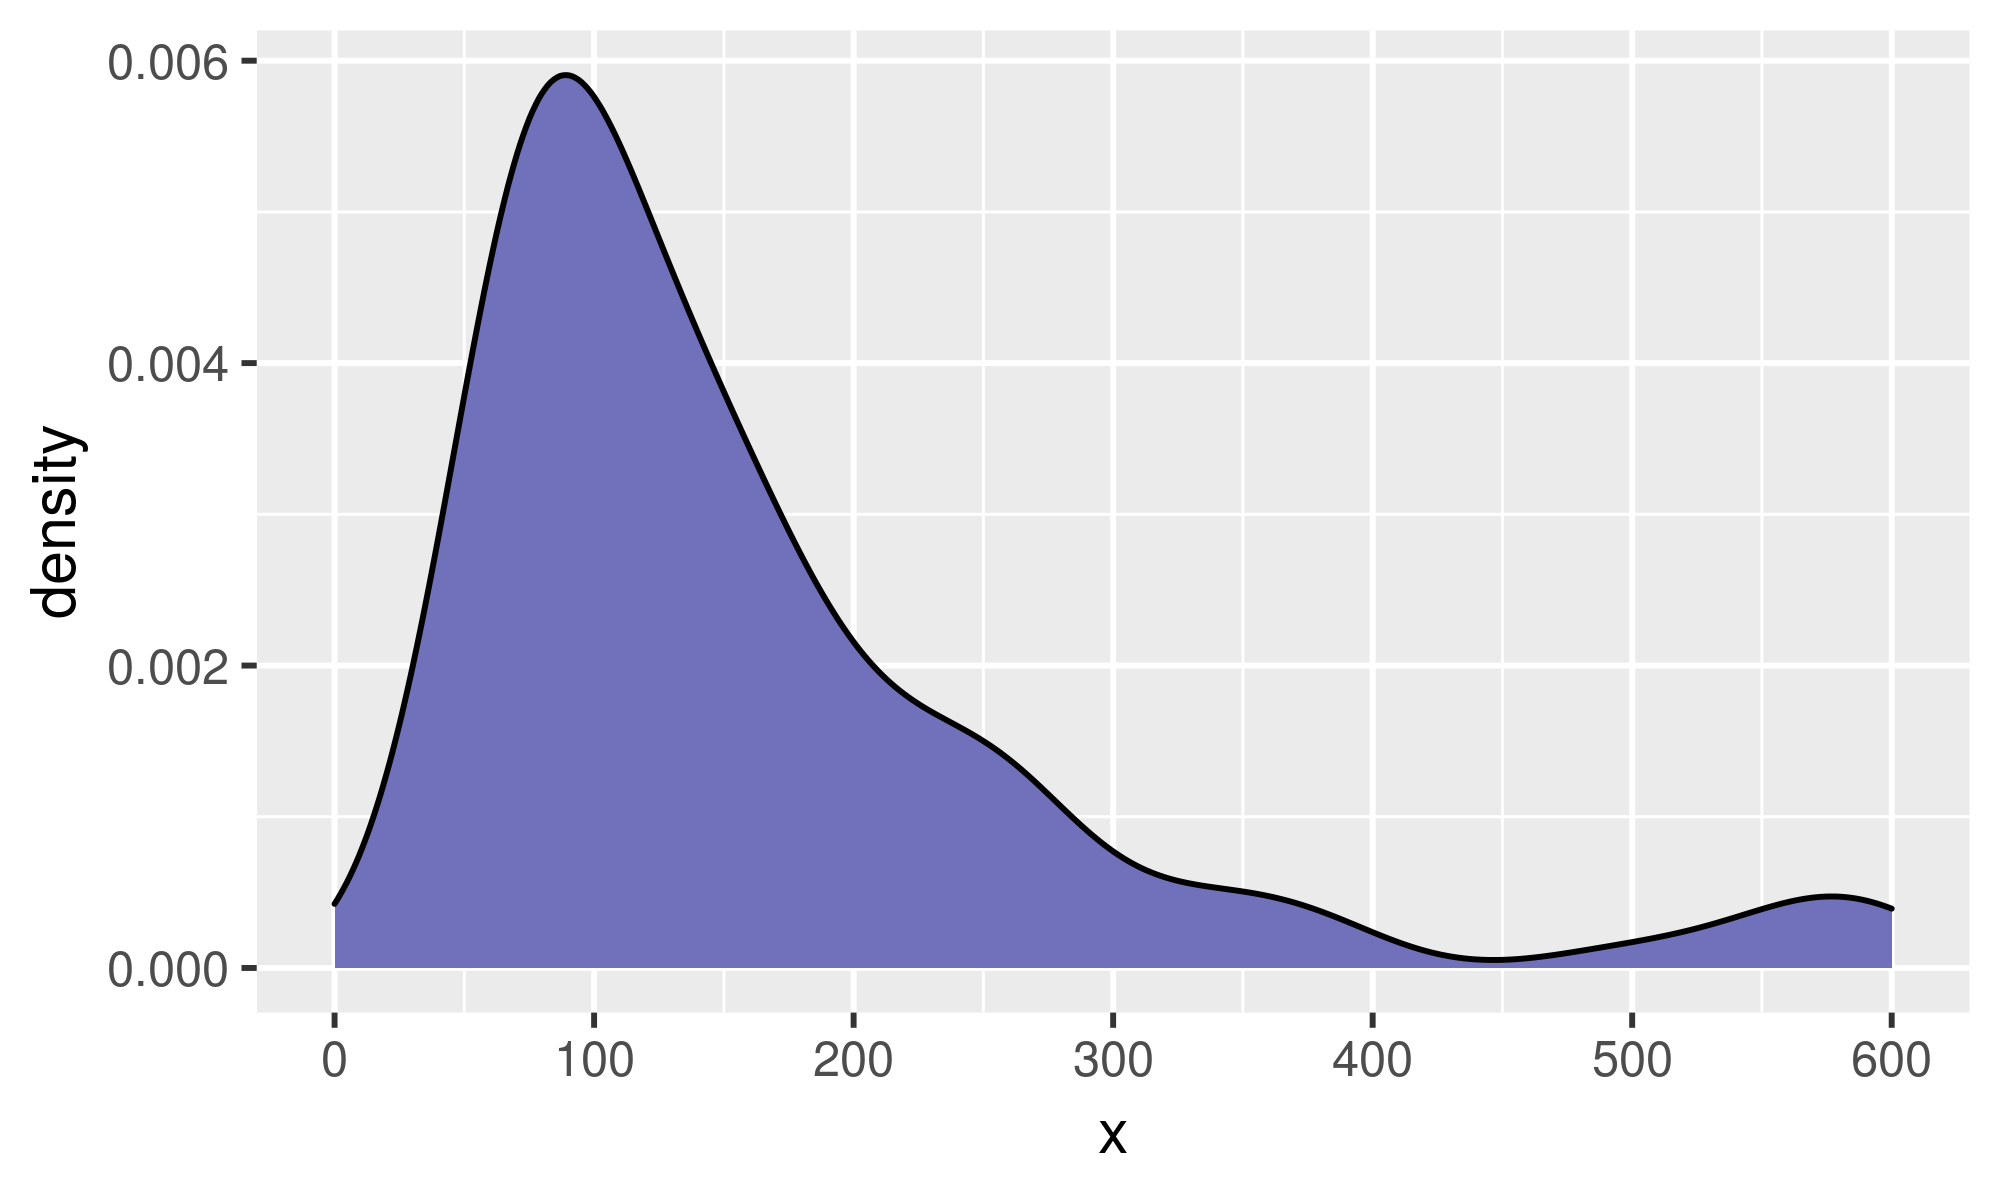

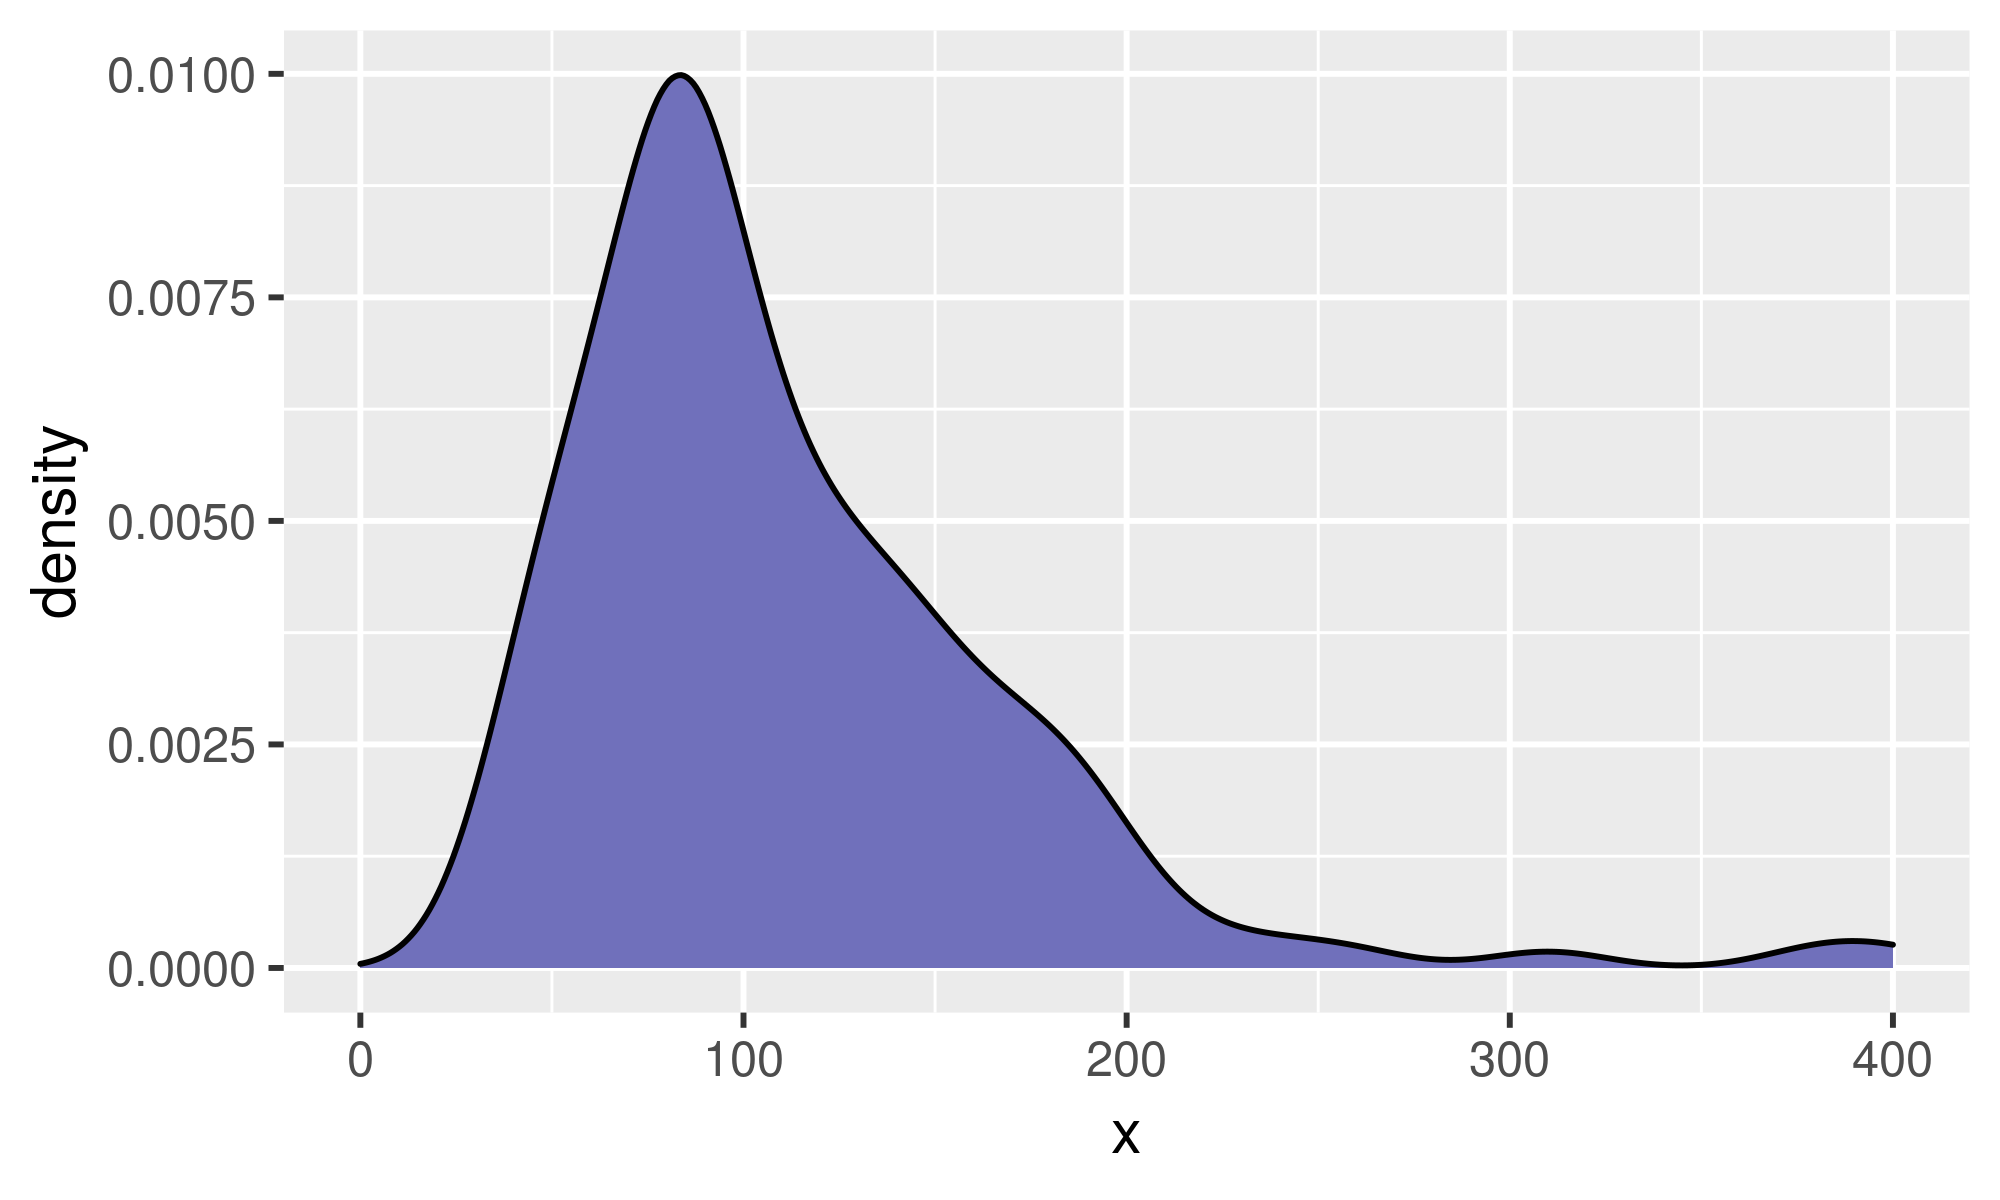

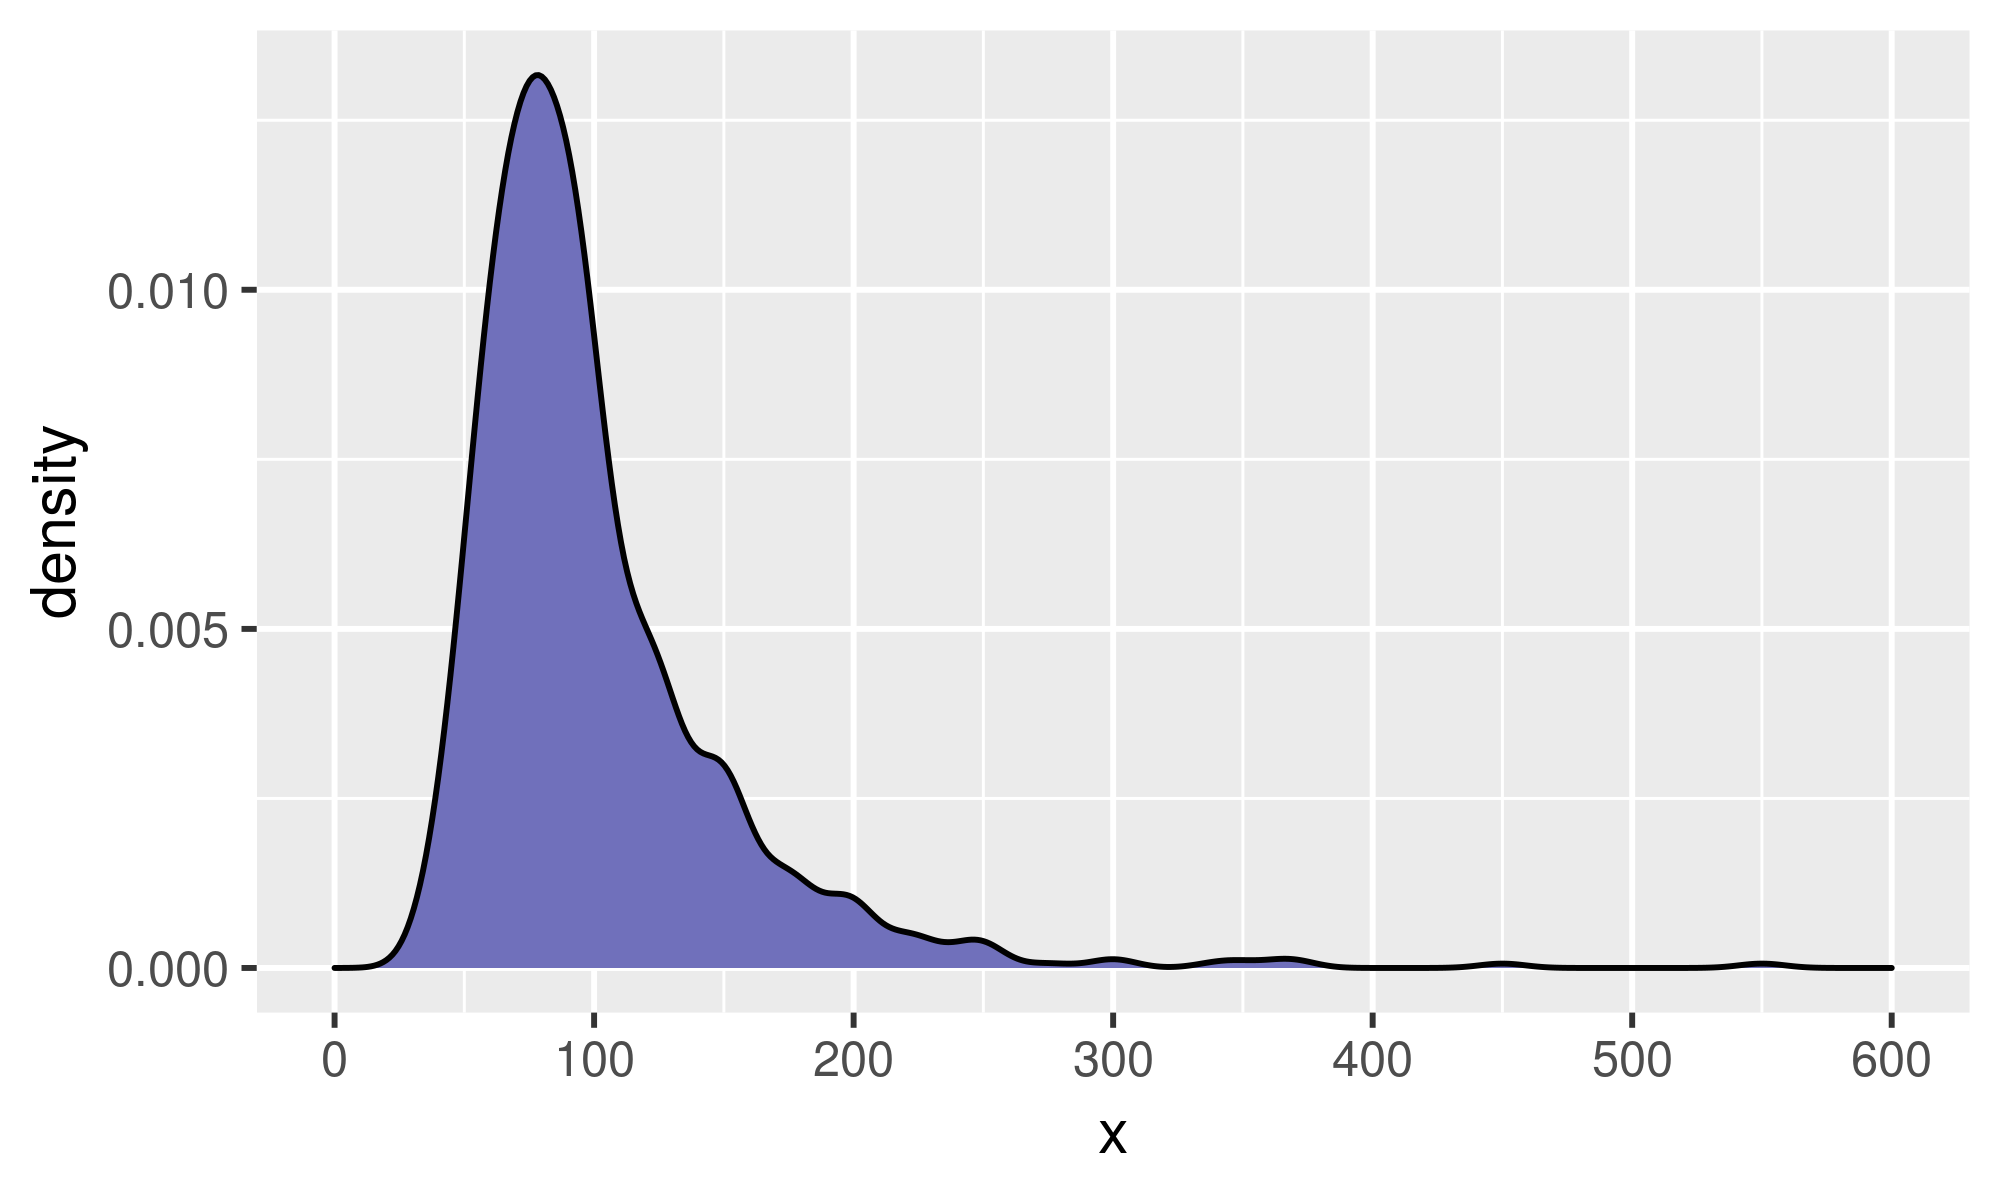

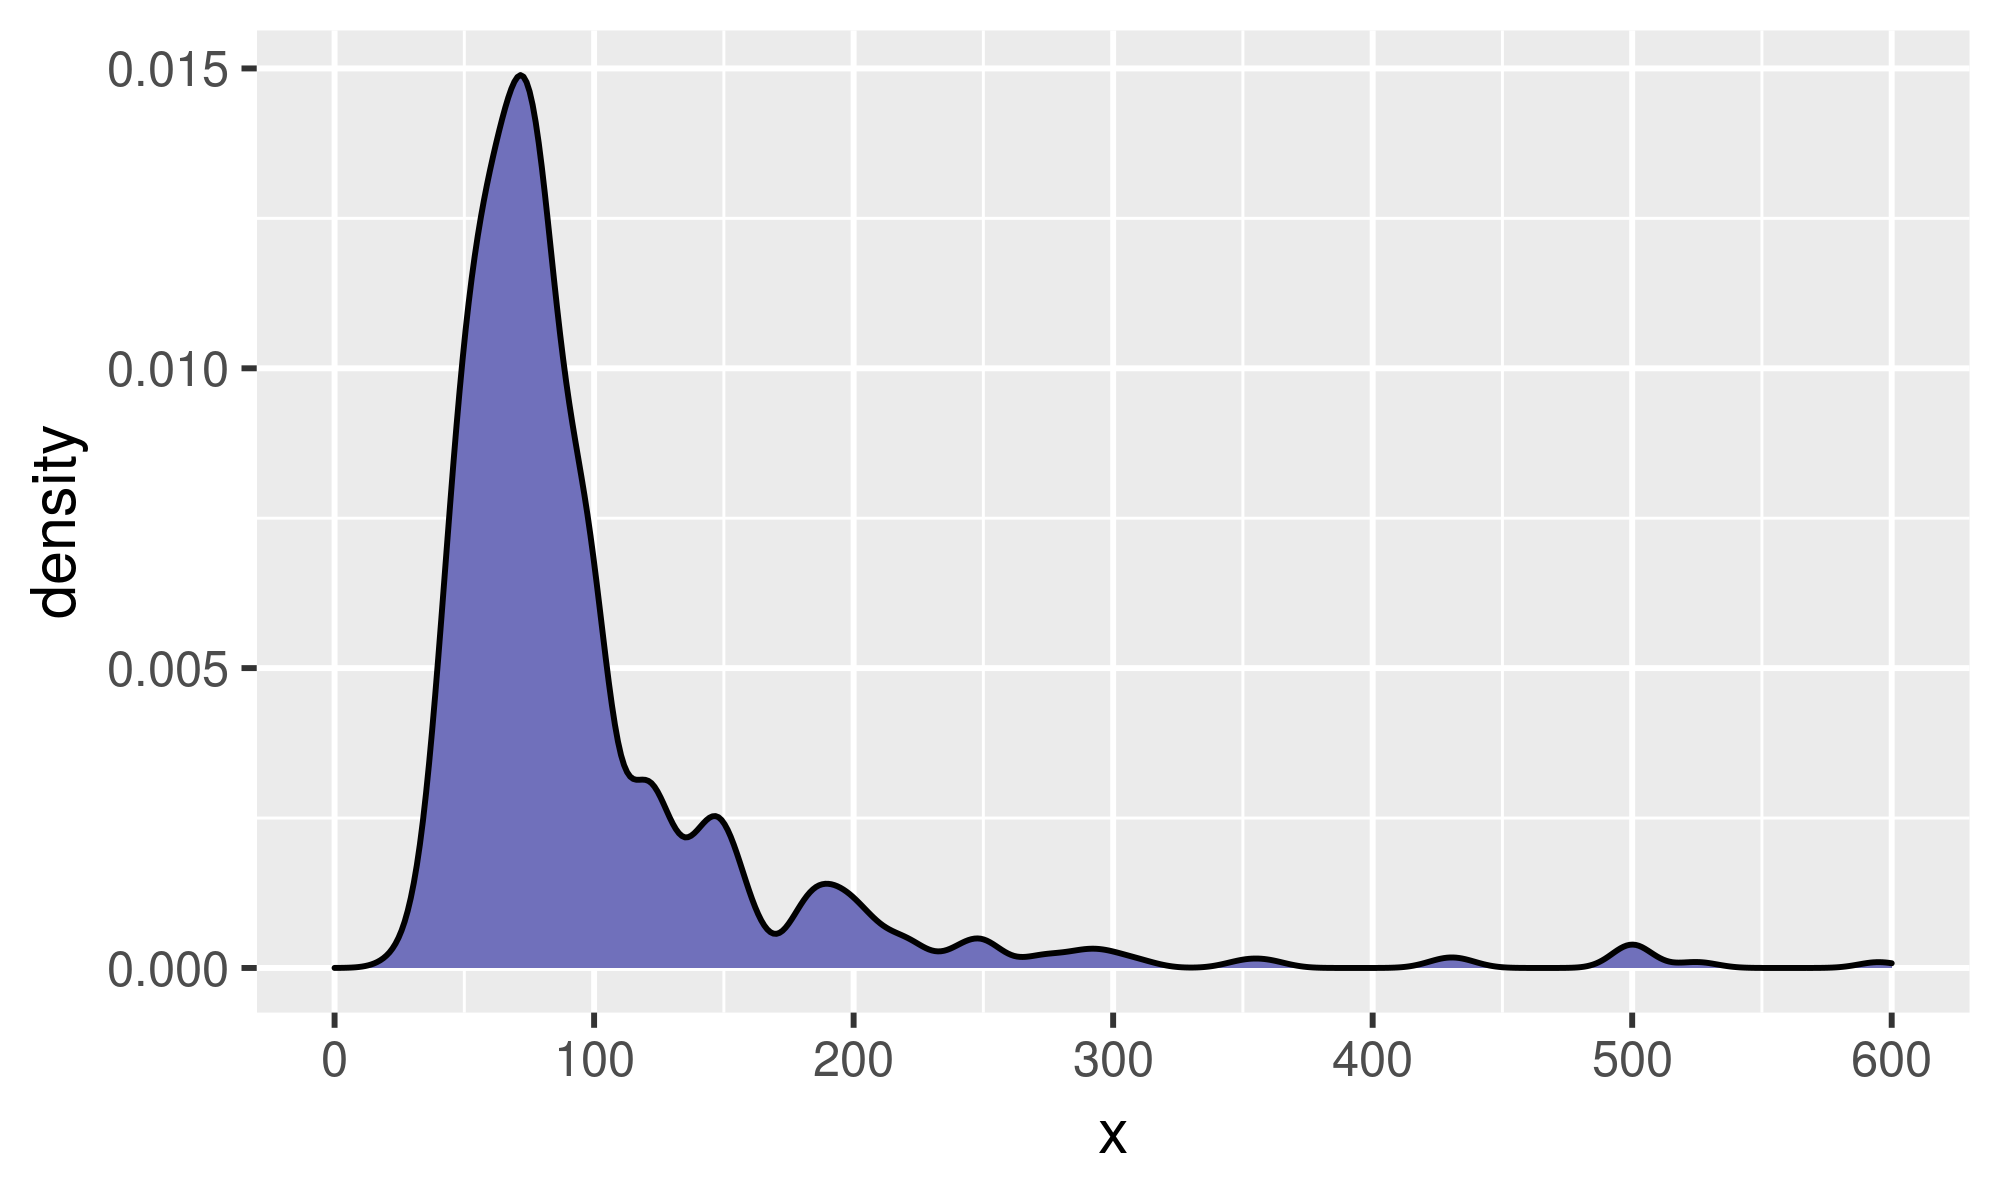

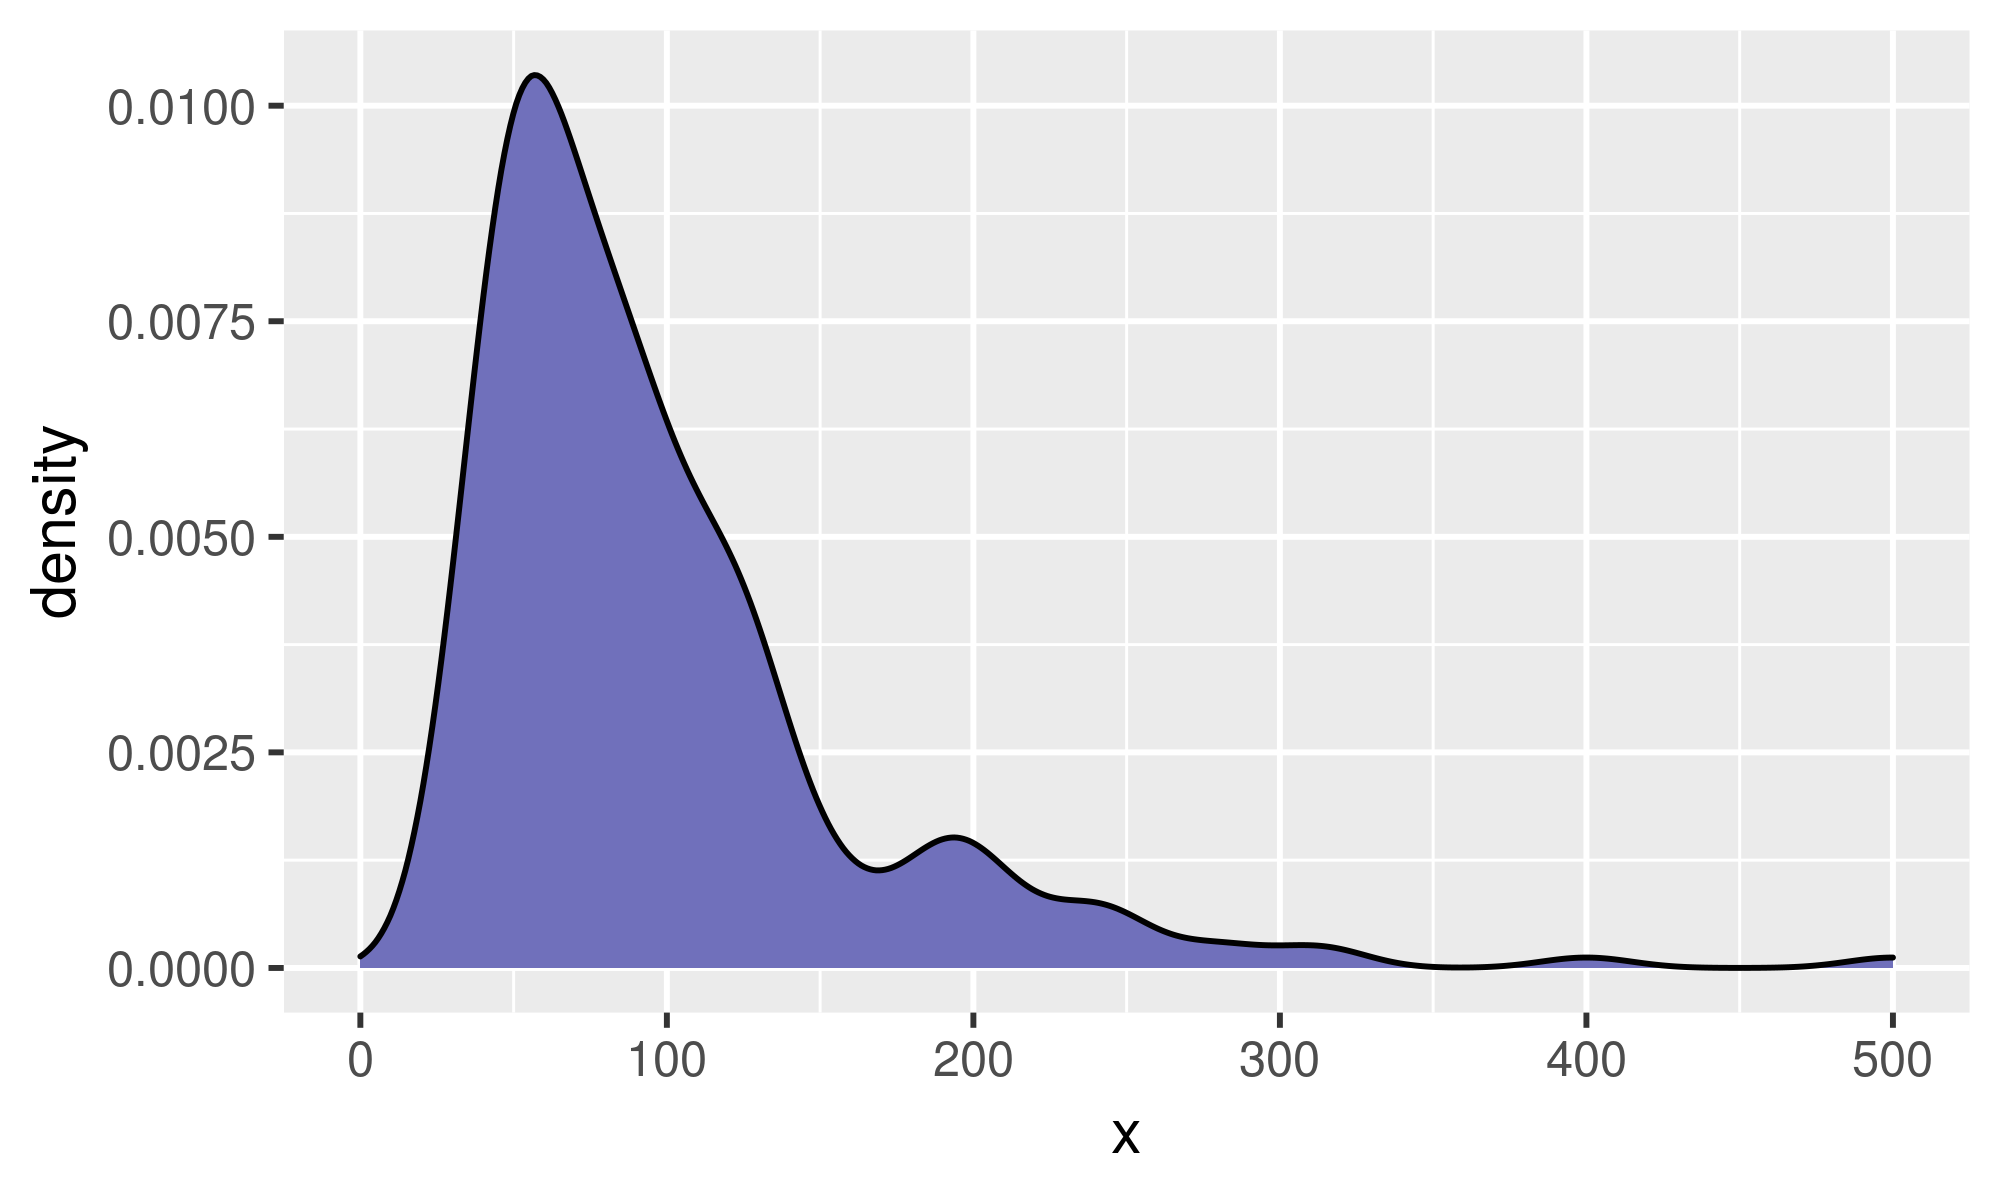

In [174]:
library(ggplot2)
v_recoletos <- airbnb_entire[airbnb_entire$Barrio == "Recoletos",]
v_recoletos <- na.omit(v_recoletos$Precio)
#summary(v_recoletos)

v_goya <- airbnb_entire[airbnb_entire$Barrio == "Goya",]
v_goya <- na.omit(v_goya$Precio)
#summary(v_goya)

v_sol <- airbnb_entire[airbnb_entire$Barrio == "Sol",]
v_sol <- na.omit(v_sol$Precio)
#summary(v_sol)

v_justicia <- airbnb_entire[airbnb_entire$Barrio == "Justicia",]
v_justicia <- na.omit(v_justicia$Precio)
#summary(v_justicia)

v_trafalgar <- airbnb_entire[airbnb_entire$Barrio == "Trafalgar",]
v_trafalgar <- na.omit(v_trafalgar$Precio)
#summary(v_trafalgar)

ggplot(data=data.frame(x=v_recoletos), aes(x))+
  geom_density(fill="#7070BB",color="#010101")+ 
  scale_x_continuous(breaks = seq(0,600,100), lim=c(0,600))

ggplot(data=data.frame(x=v_goya), aes(x))+
  geom_density(fill="#7070BB",color="#010101")+ 
  scale_x_continuous(breaks = seq(0,400,100), lim=c(0,400))

ggplot(data=data.frame(x=v_sol), aes(x))+
  geom_density(fill="#7070BB",color="#010101")+ 
  scale_x_continuous(breaks = seq(0,600,100), lim=c(0,600))

ggplot(data=data.frame(x=v_justicia), aes(x))+
  geom_density(fill="#7070BB",color="#010101")+ 
  scale_x_continuous(breaks = seq(0,600,100), lim=c(0,600))

ggplot(data=data.frame(x=v_trafalgar), aes(x))+
  geom_density(fill="#7070BB",color="#010101")+ 
  scale_x_continuous(breaks = seq(0,500,100), lim=c(0,500))

Calcula el tamaño medio, en metros cuadrados, para los 5 barrios anteriores y muestralo en el mismo dataframe junto con el precio y número de entradas

In [175]:
mean_size <- aggregate(MetrosCuadrados ~ Barrio, barrios_apartamentos, mean, na.rm=TRUE)
new_barrios_apartamentos <- merge(mean_size, new_barrios_apartamentos, by = "Barrio")
new_barrios_apartamentos <- new_barrios_apartamentos[order(new_barrios_apartamentos$Precio, decreasing = TRUE), ]
head(new_barrios_apartamentos[new_barrios_apartamentos$Count > 100,], n=5)

,Barrio,MetrosCuadrados,Precio,Count
,<chr>,<dbl>,<dbl>,<int>
40,Recoletos,26.66316,165.53279,122
24,Goya,51.68504,112.16393,122
46,Sol,44.81810,100.99691,648
27,Justicia,30.30960,98.82099,486
47,Trafalgar,29.30426,94.07389,203


Dibuja el diagrama de densidad de distribución de los diferentes tamaños de apartamentos. Serían 5 gráficas, una por cada barrio.

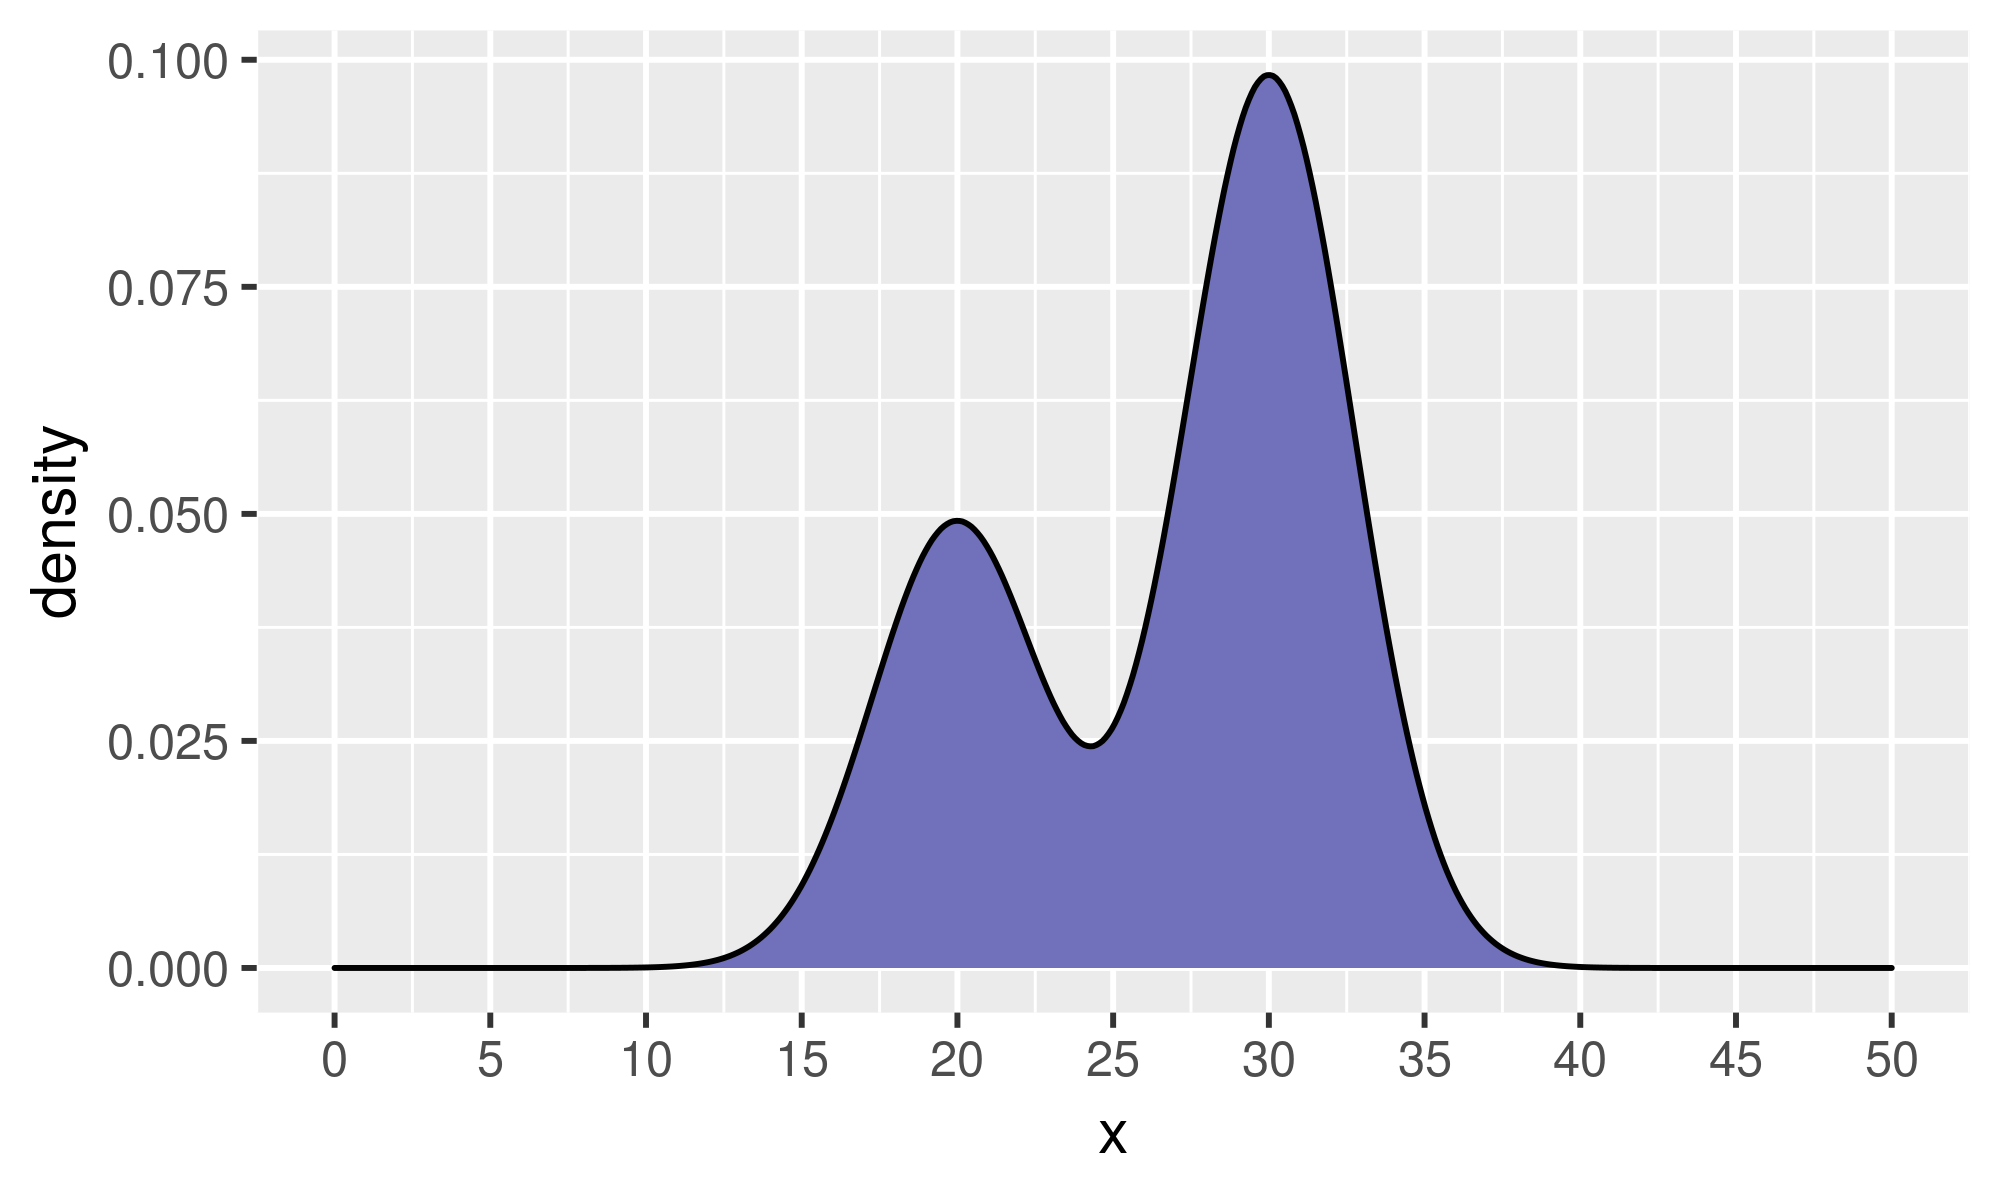

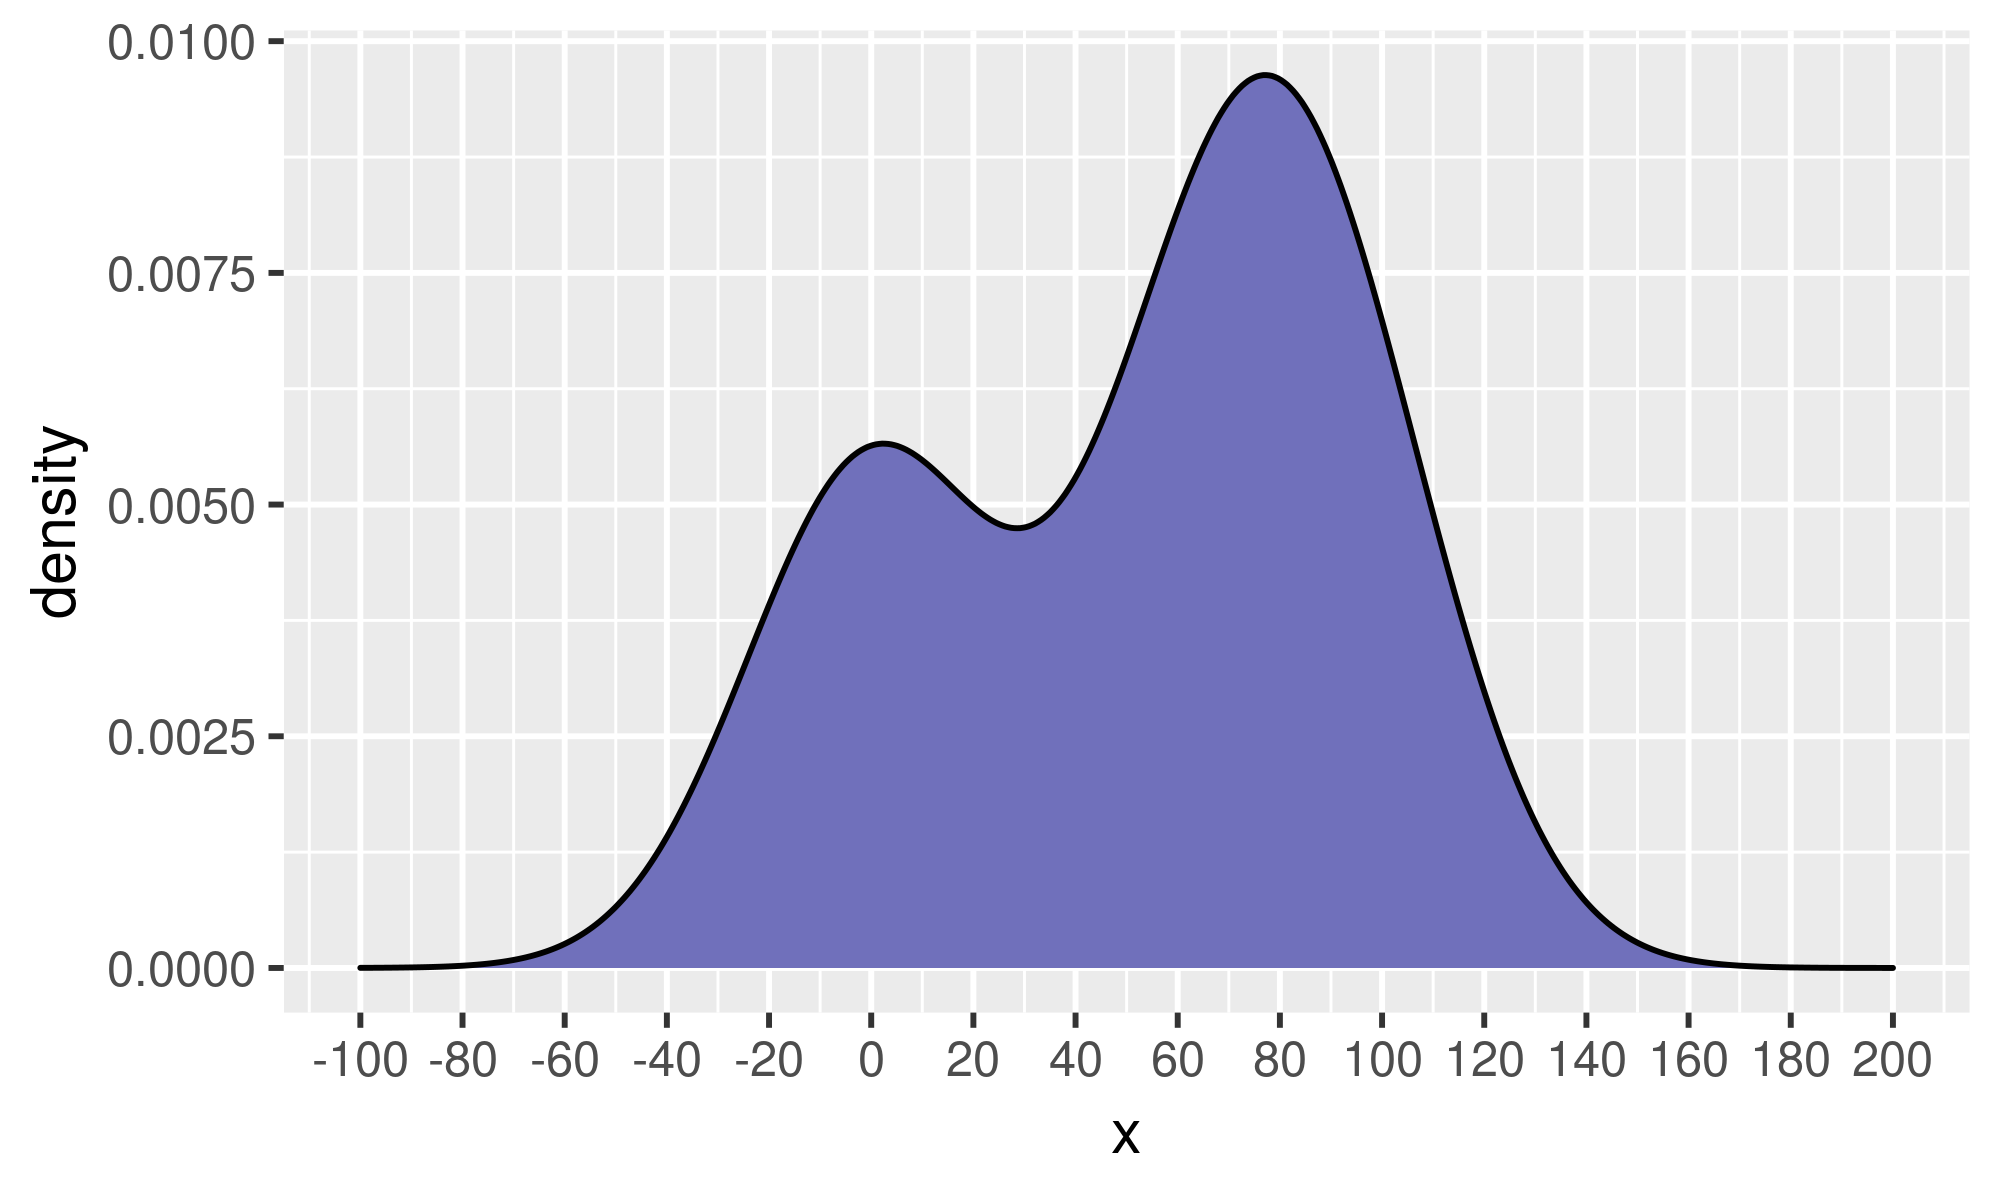

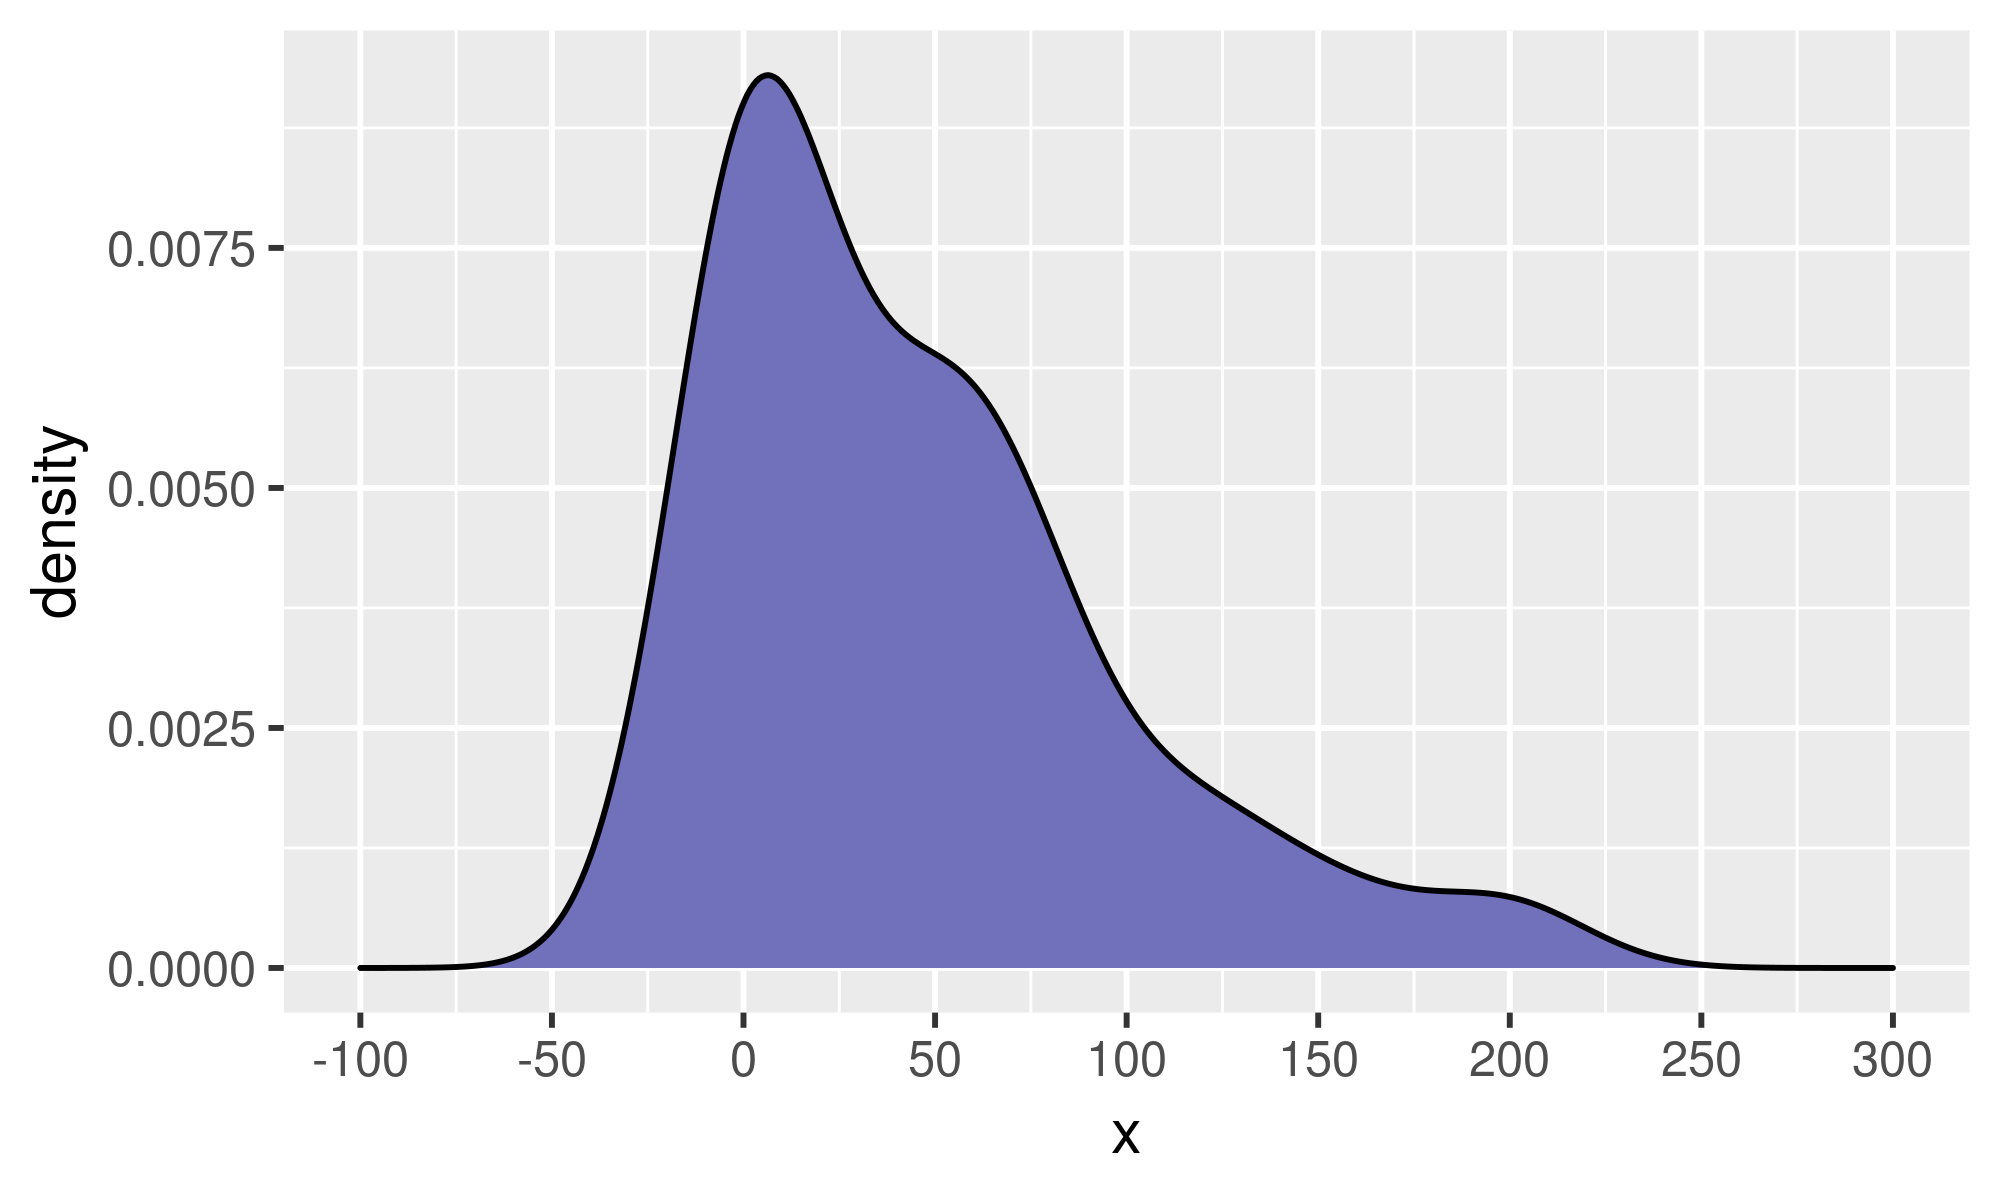

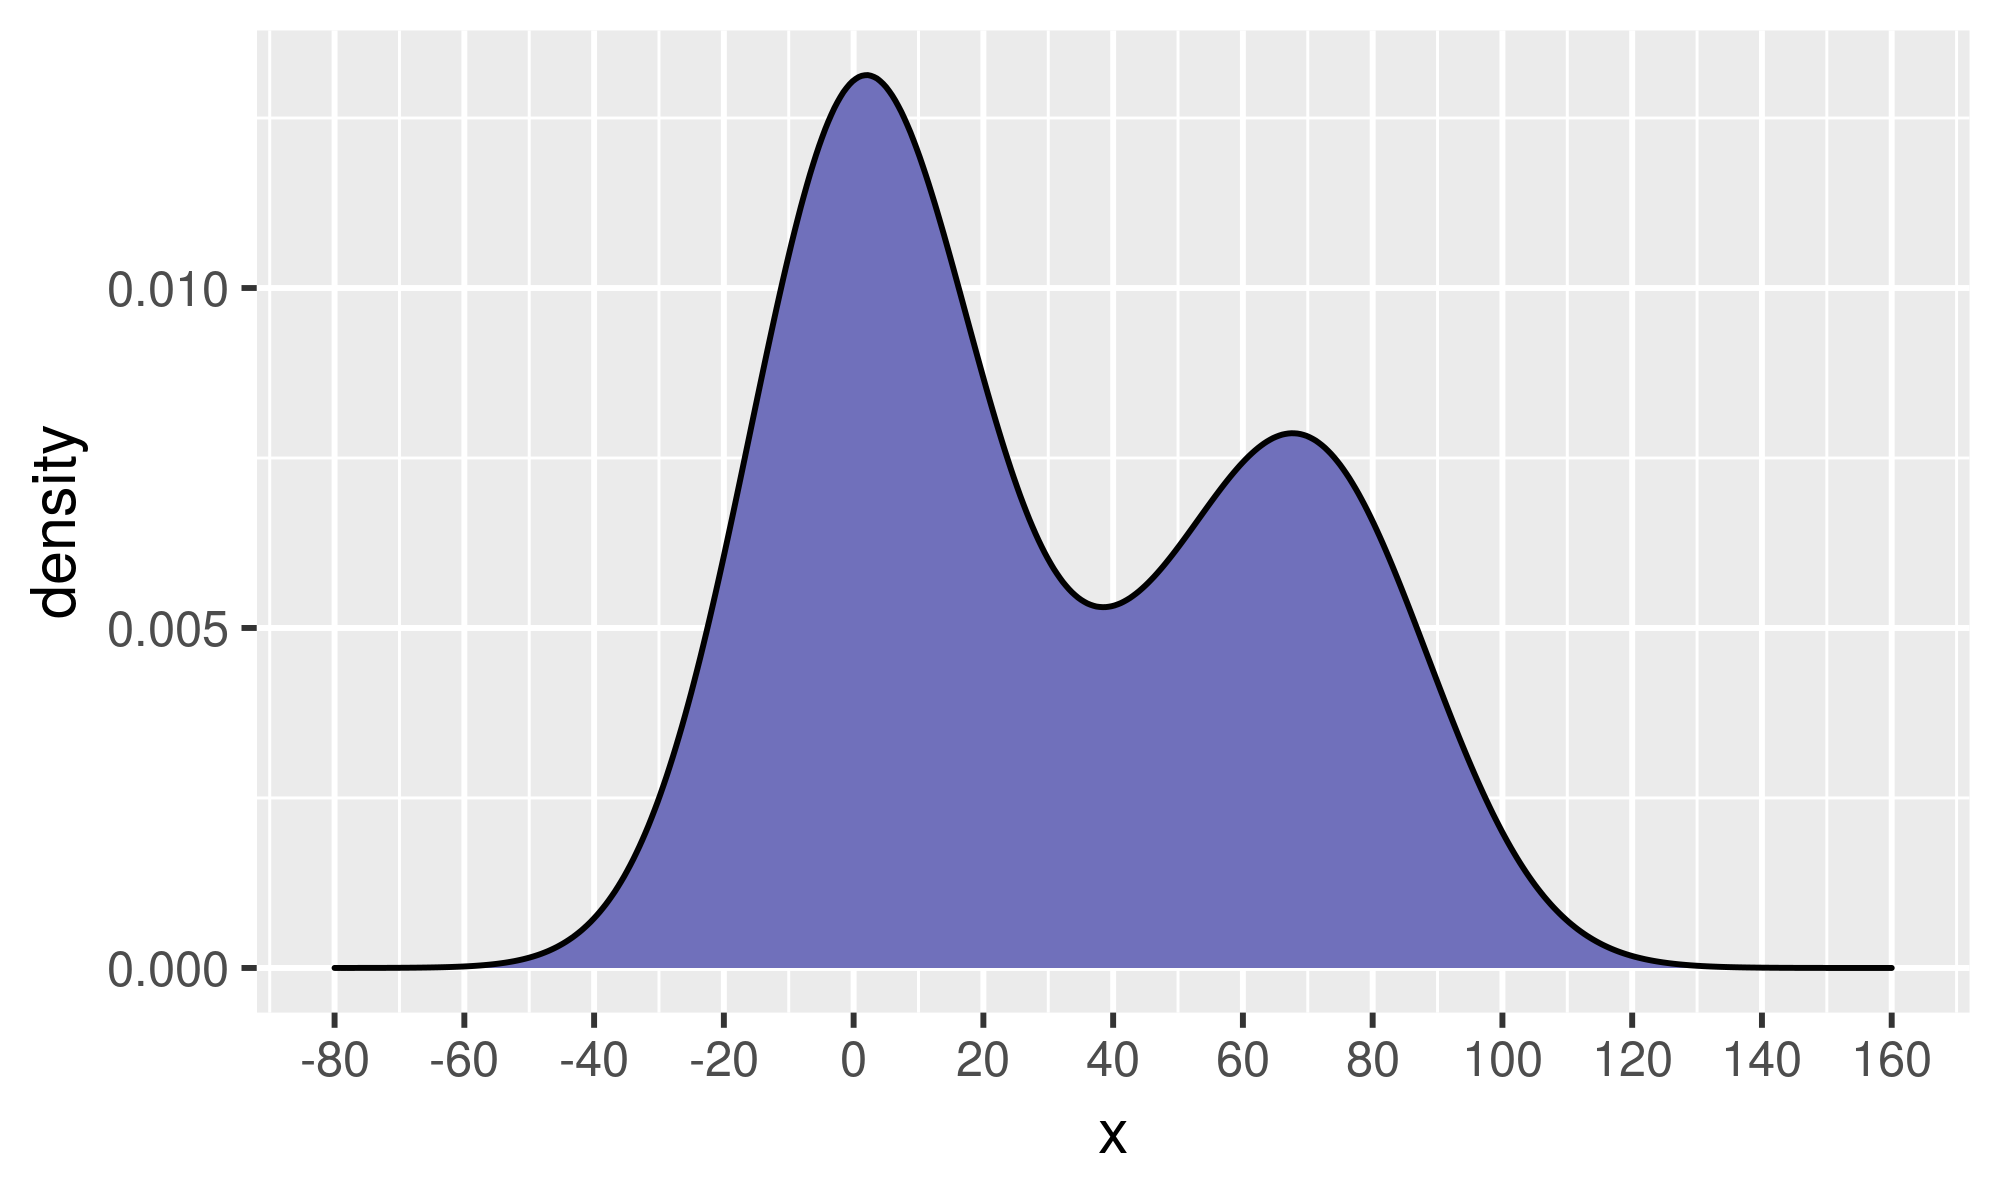

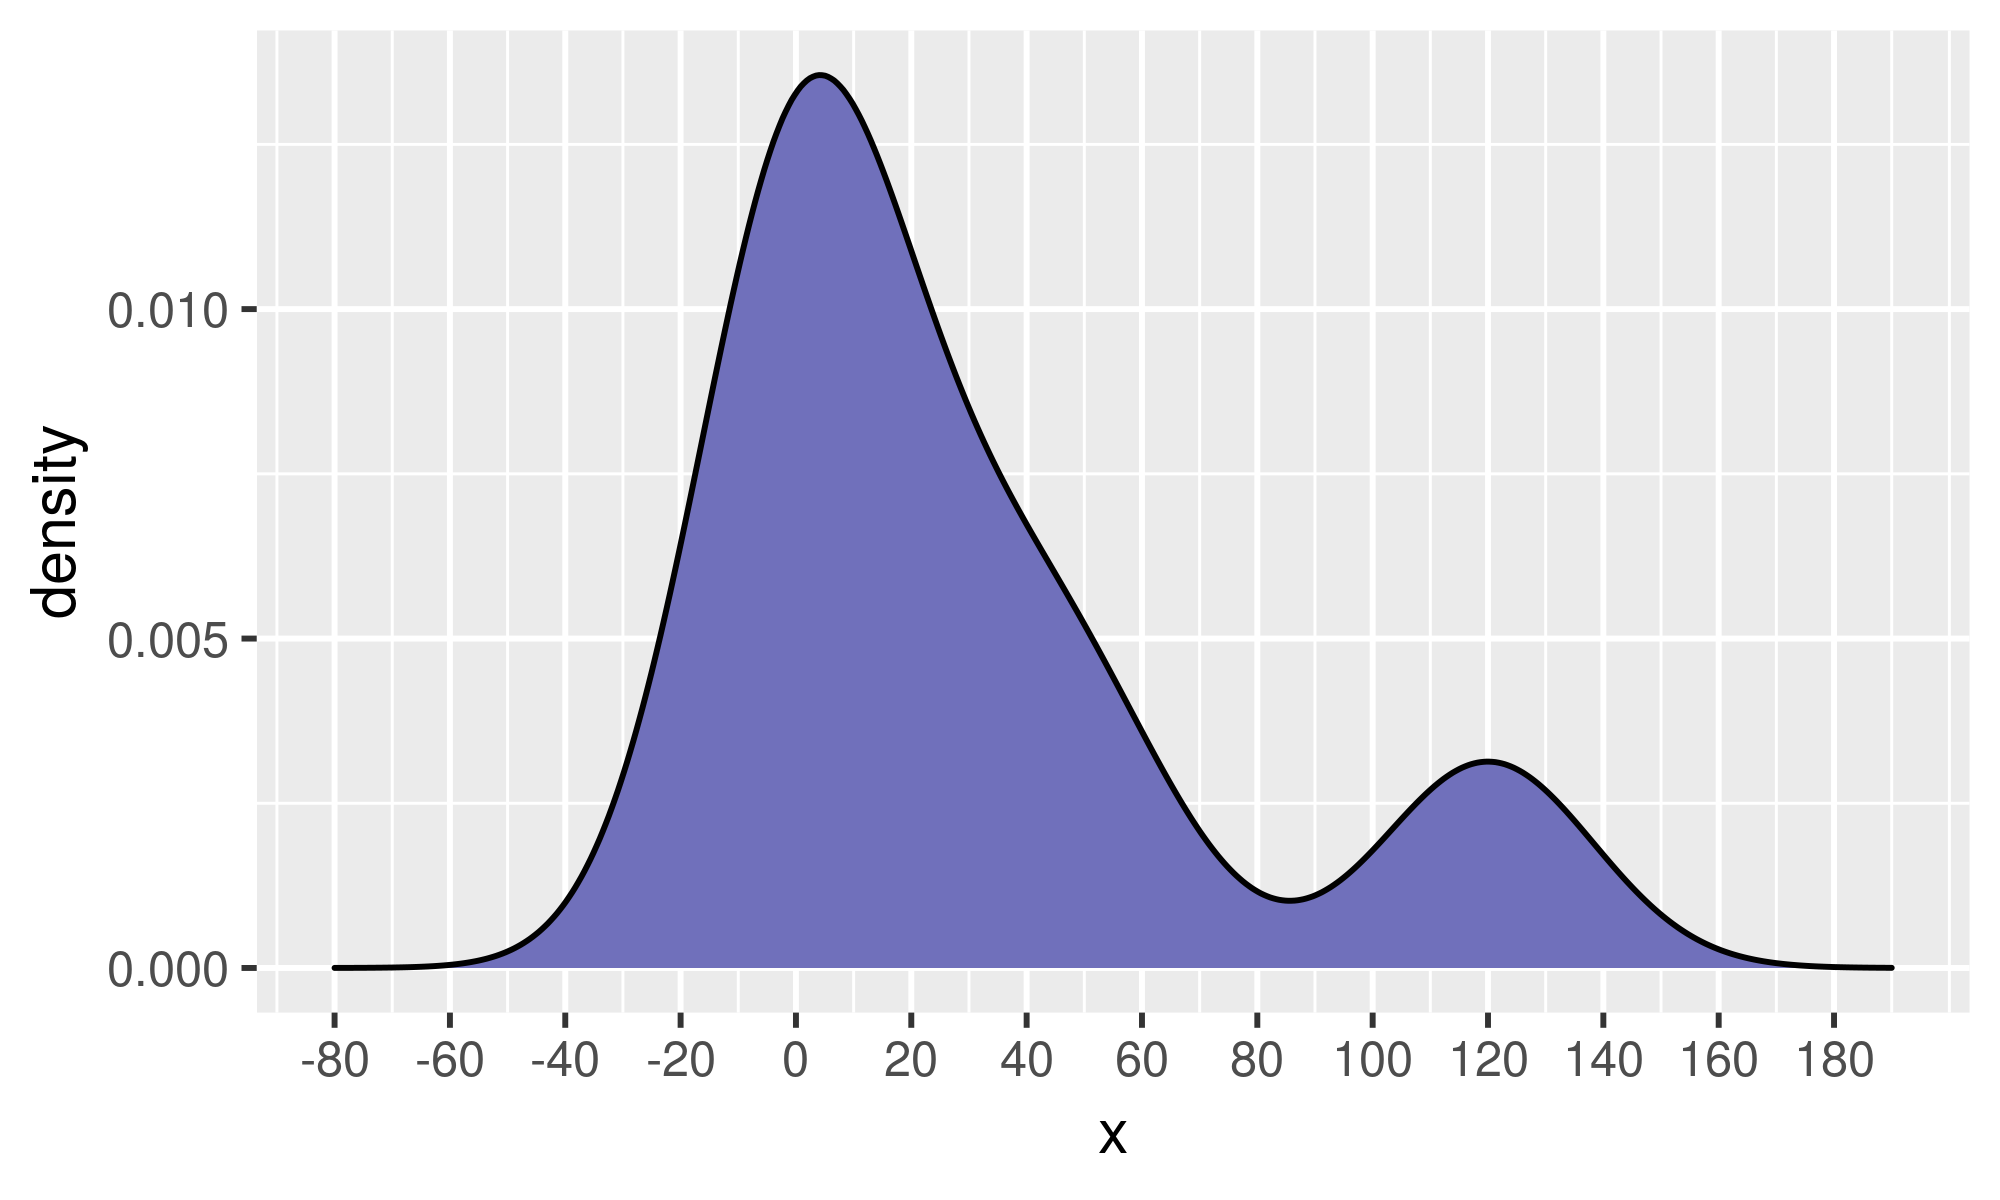

In [176]:
library(ggplot2)
v_recoletos <- airbnb_entire[airbnb_entire$Barrio == "Recoletos",]
v_recoletos <- na.omit(v_recoletos$MetrosCuadrados)
#summary(v_recoletos)

v_goya <- airbnb_entire[airbnb_entire$Barrio == "Goya",]
v_goya <- na.omit(v_goya$MetrosCuadrados)
#summary(v_goya)

v_sol <- airbnb_entire[airbnb_entire$Barrio == "Sol",]
v_sol <- na.omit(v_sol$MetrosCuadrados)
#summary(v_sol)

v_justicia <- airbnb_entire[airbnb_entire$Barrio == "Justicia",]
v_justicia <- na.omit(v_justicia$MetrosCuadrados)
#summary(v_justicia)

v_trafalgar <- airbnb_entire[airbnb_entire$Barrio == "Trafalgar",]
v_trafalgar <- na.omit(v_trafalgar$MetrosCuadrados)
#summary(v_trafalgar)

ggplot(data=data.frame(x=v_recoletos), aes(x))+
  geom_density(fill="#7070BB",color="#010101")+ 
  scale_x_continuous(breaks = seq(0,50,5), lim=c(0,50))

ggplot(data=data.frame(x=v_goya), aes(x))+
  geom_density(fill="#7070BB",color="#010101")+ 
  scale_x_continuous(breaks = seq(-100,200,20), lim=c(-100,200))

ggplot(data=data.frame(x=v_sol), aes(x))+
  geom_density(fill="#7070BB",color="#010101")+ 
  scale_x_continuous(breaks = seq(-100,300,50), lim=c(-100,300))

ggplot(data=data.frame(x=v_justicia), aes(x))+
  geom_density(fill="#7070BB",color="#010101")+ 
  scale_x_continuous(breaks = seq(-80,160,20), lim=c(-80,160))

ggplot(data=data.frame(x=v_trafalgar), aes(x))+
  geom_density(fill="#7070BB",color="#010101")+ 
  scale_x_continuous(breaks = seq(-80,190,20), lim=c(-80,190))

Esta claro que las medias de metros cuadrados de cada uno de estos 5 barrios parecen ser diferentes, pero ¿son estadísticamente diferentes?
¿Que test habría que usar para comprobarlo?

In [177]:
mean_recoletos <- na.omit(airbnb_limpio[airbnb_limpio$Barrio == "Recoletos", "MetrosCuadrados"])
mean_goya <- na.omit(airbnb_limpio[airbnb_limpio$Barrio == "Goya", "MetrosCuadrados"])
mean_sol <- na.omit(airbnb_limpio[airbnb_limpio$Barrio == "Sol", "MetrosCuadrados"])
mean_justicia <- na.omit(airbnb_limpio[airbnb_limpio$Barrio == "Justicia", "MetrosCuadrados"])
mean_trafalgar <- na.omit(airbnb_limpio[airbnb_limpio$Barrio == "Trafalgar", "MetrosCuadrados"])

paste("Comprobamos si las medias son estadísticamente significativas: Utilizaremos el Test de Kruskal")

df <- rbind(data.frame(value=mean_recoletos,cl="1"),data.frame(value=mean_goya,cl="2"),data.frame(value=mean_sol,cl="3"),data.frame(value=mean_justicia,cl="4"),data.frame(value=mean_trafalgar,cl="5"))
df$cl <- as.factor(df$cl)
#head(df)
#str(df)

kruskal.test(value ~ cl, data=df)
paste("Segun los resultados no existe una diferencia estadisticamente significativa.")


[1] "Comprobamos si las medias son estadísticamente significativas: Utilizaremos el Test de Kruskal"


	Kruskal-Wallis rank sum test

data:  value by cl
Kruskal-Wallis chi-squared = 1.4674, df = 4, p-value = 0.8324


[1] "Segun los resultados no existe una diferencia estadisticamente significativa."

Para únicamente los pisos de alquiler en el barrio de Sol:

barrio_sol<-subset(airbnb_entire,Barrio=="Sol")

Calcular un modelo lineal que combine alguna de estas variables:
* NumBanyos
* NumDormitorios
* MaxOcupantes
* MetrosCuadrados

In [178]:
barrio_sol <- subset(airbnb_entire,Barrio=="Sol")
barrio_sol <- na.omit(barrio_sol)

#barrio_sol

num_banyos <- barrio_sol$NumBanyos
num_dormitorios <- barrio_sol$NumDormitorios
max_ocupantes <- barrio_sol$MaxOcupantes
m2 <- barrio_sol$MetrosCuadrados

Primero calculamos la correlación para ver como se relacionan estas variables entre sí.

In [179]:
cr1 <- cor(num_banyos,num_dormitorios)
paste("La correlación de las variables num_banyos,num_dormitorios es:",round(cr1,2))
cr2 <- cor(num_banyos,max_ocupantes)
paste("La correlación de las variables num_banyos,max_ocupantes es:",round(cr2,2))
cr3 <- cor(num_banyos,m2)
paste("La correlación de las variables num_banyos,m2 es:",round(cr3,2))
cr4 <- cor(num_dormitorios,max_ocupantes)
paste("La correlación de las variables num_dormitorios,max_ocupantes es:",round(cr4,2))
cr5 <- cor(num_dormitorios,m2)
paste("La correlación de las variables num_dormitorios,m2 es:",round(cr5,2))
cr6 <- cor(max_ocupantes,m2)
paste("La correlación de las variables max_ocupantes,m2 es:",round(cr6,2))

[1] "La correlación de las variables num_banyos,num_dormitorios es: 0.68"

[1] "La correlación de las variables num_banyos,max_ocupantes es: 0.68"

[1] "La correlación de las variables num_banyos,m2 es: 0.45"

[1] "La correlación de las variables num_dormitorios,max_ocupantes es: 0.78"

[1] "La correlación de las variables num_dormitorios,m2 es: 0.55"

[1] "La correlación de las variables max_ocupantes,m2 es: 0.4"

Se observa que la correlación entre el número de dormitorios y los metros cuadrados es sorprendentemente baja.
¿Son de fiar esos números?

Mediante un histograma o curvas de densidad podemos descartar números que notienen sentido en el dataframe barrio_sol,
para tener una matriz de correlación que tenga mayor sentido.


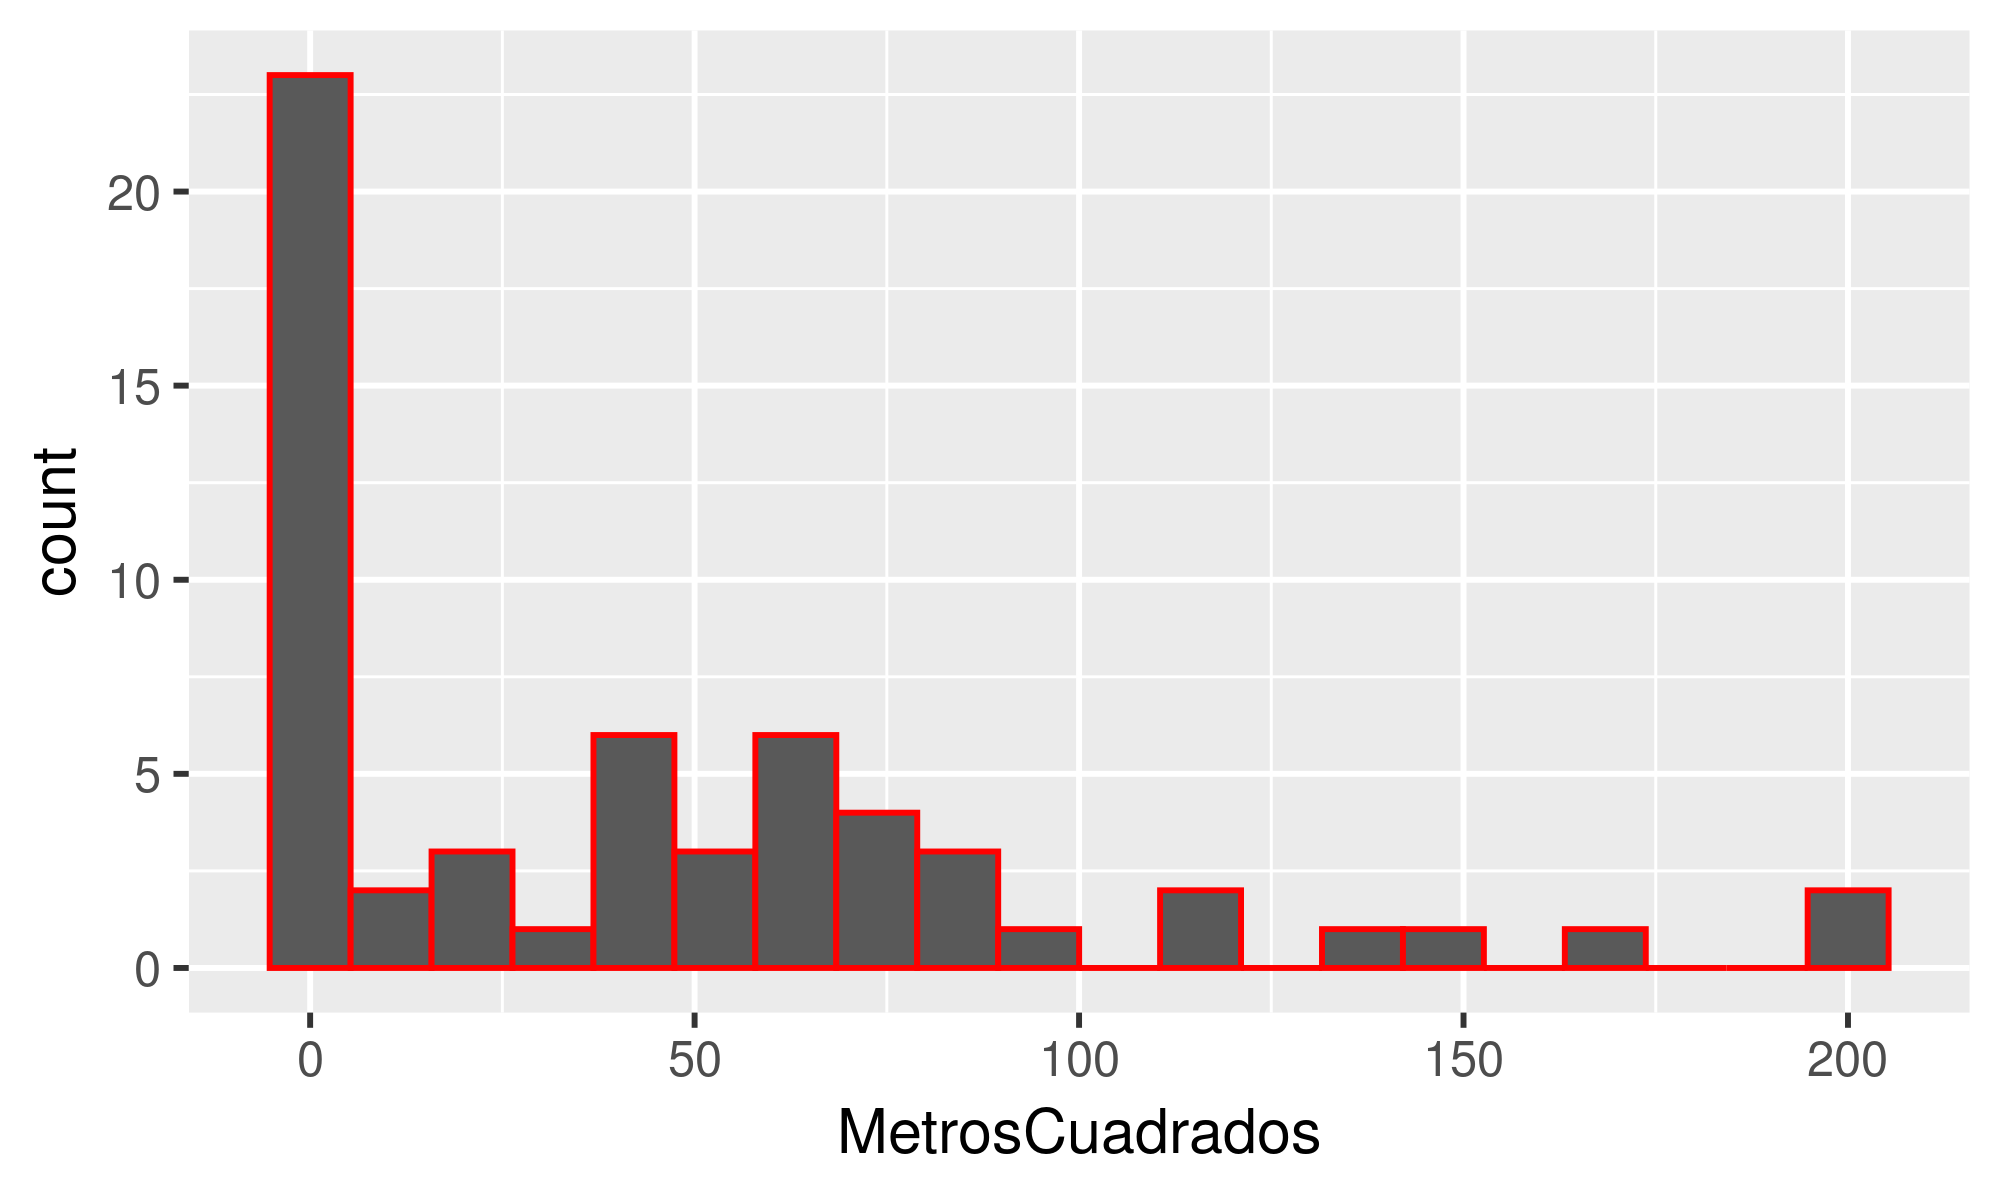

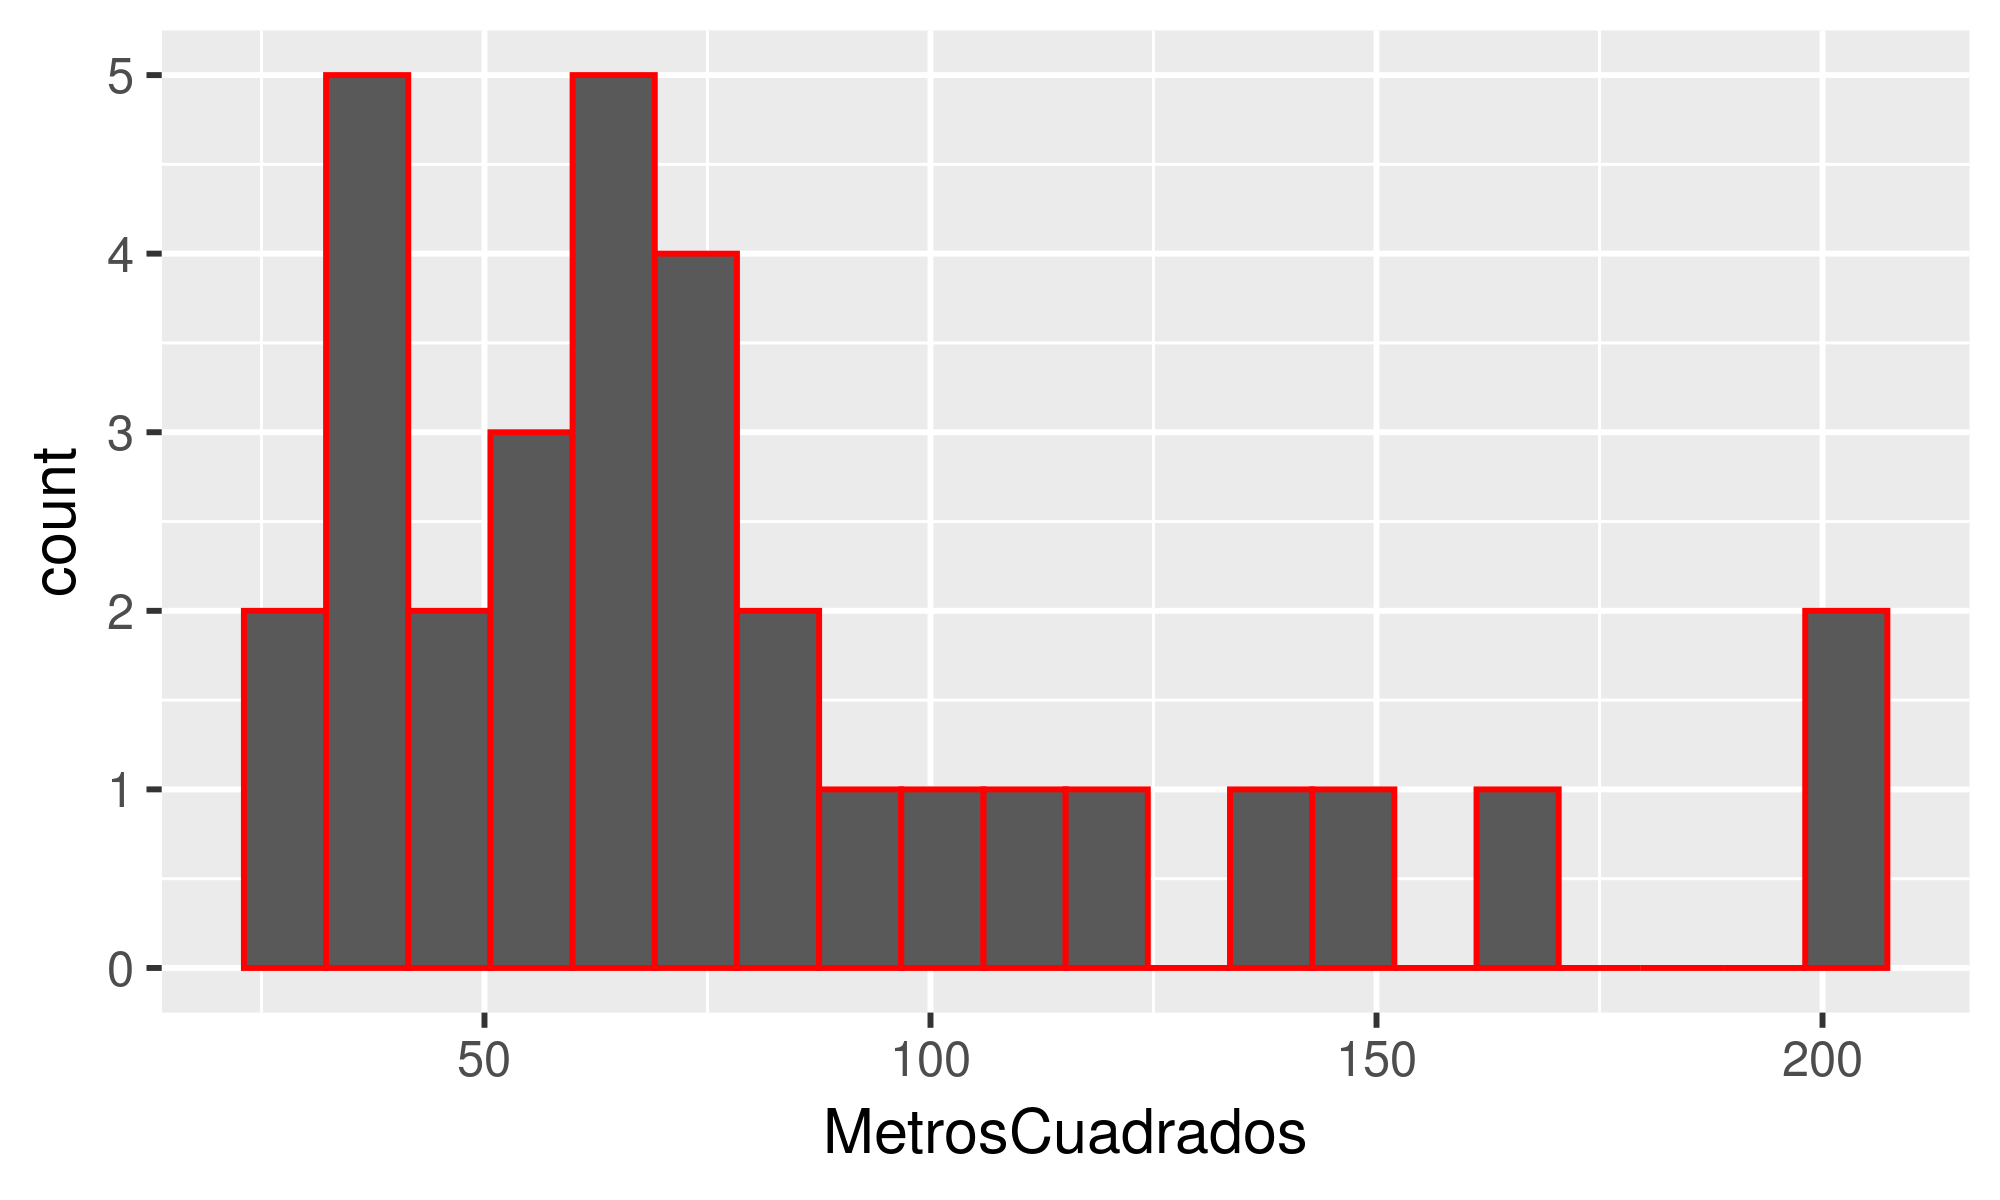

In [180]:
ggplot(data=barrio_sol, aes(MetrosCuadrados))+
    geom_histogram(bins=20, color='red')

#eliminamos los datos que consideramos que no son apartamentos completos < 20m2
barrio_sol_new <- barrio_sol[barrio_sol$MetrosCuadrados > 20,]

ggplot(data=barrio_sol_new, aes(MetrosCuadrados))+
    geom_histogram(bins=20, color='red')



Una vez que hayamos filtrado los datos correspondientes calcular el valor o la combinación de valores que mejor nos permite obtener el precio de un inmueble.

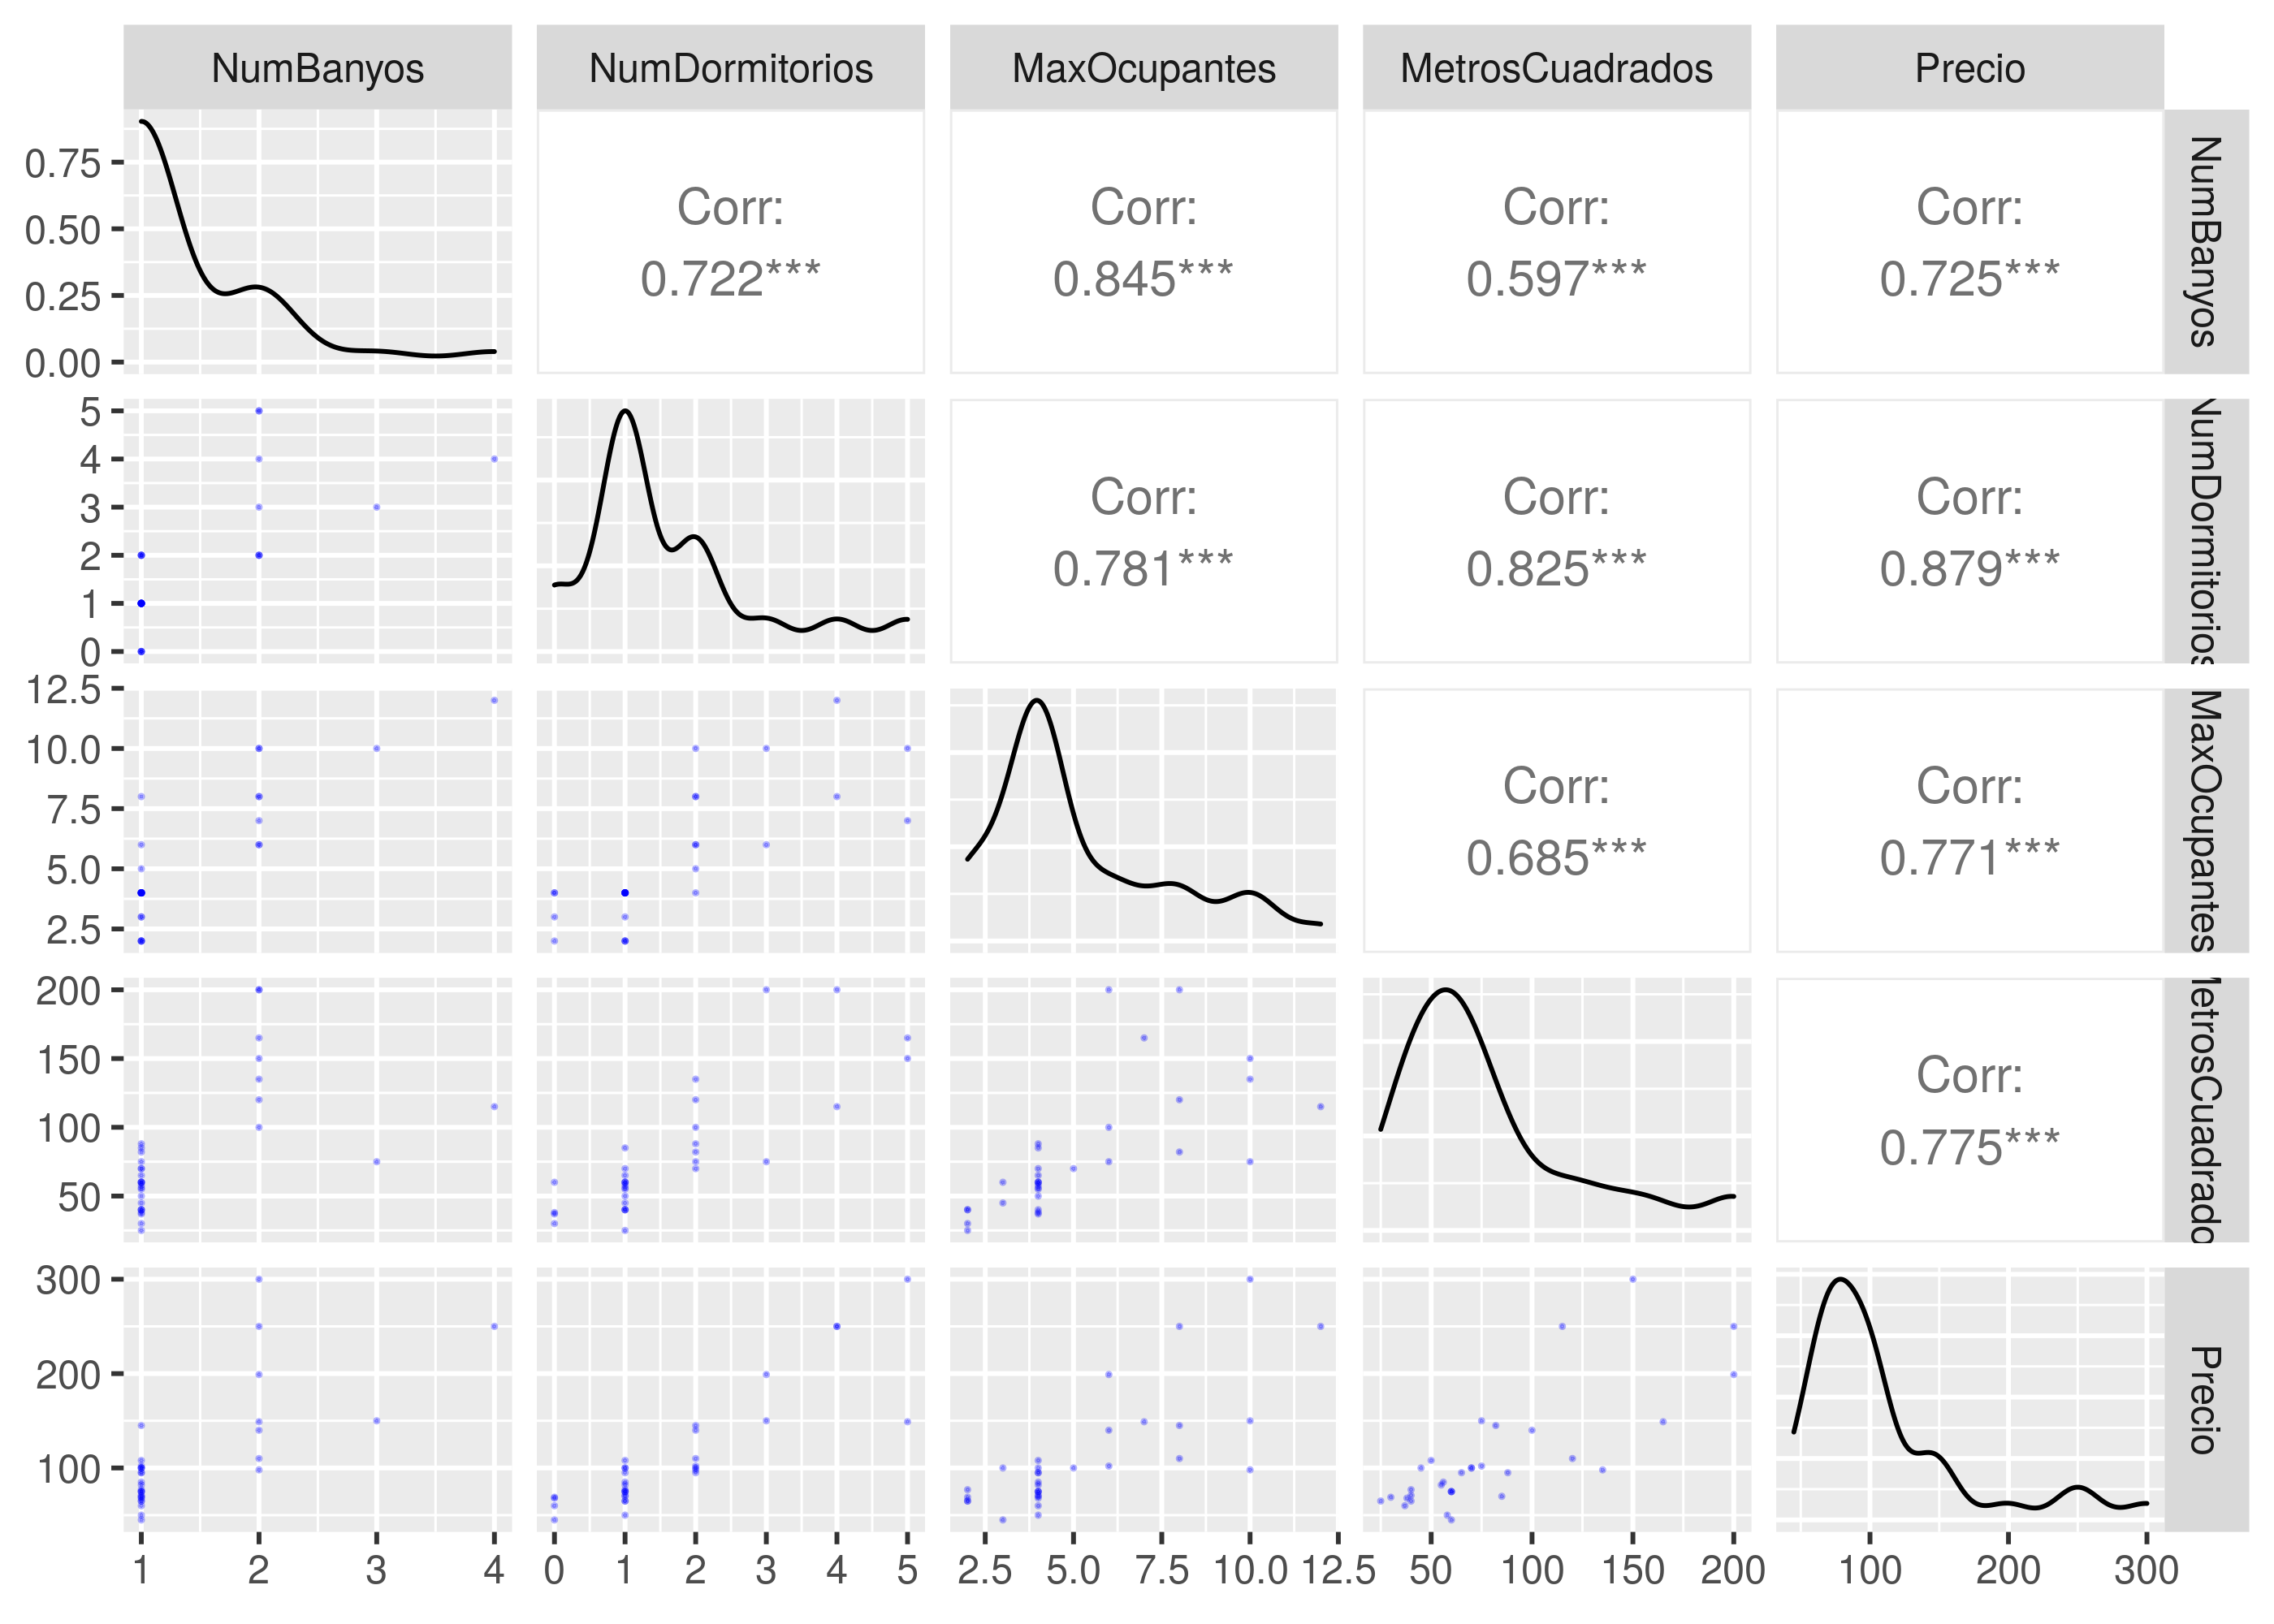

In [181]:
library(GGally)
options(repr.plot.height=5,repr.plot.width=7)
ggpairs(barrio_sol_new[,c("NumBanyos","NumDormitorios","MaxOcupantes","MetrosCuadrados","Precio")],
       #lower = list(continuous = wrap("density", alpha = 0.8,size=0.2,color='blue'))
       lower = list(continuous = wrap("points", alpha = 0.3,size=0.1,color='blue'))
       )

In [182]:
model <- lm(data=barrio_sol_new, formula=Precio ~ NumBanyos+NumDormitorios+MaxOcupantes+MetrosCuadrados)
summary(model)
confint(model)


Call:
lm(formula = Precio ~ NumBanyos + NumDormitorios + MaxOcupantes + 
    MetrosCuadrados, data = barrio_sol_new)

Residuals:
    Min      1Q  Median      3Q     Max 
-78.421 -13.472  -1.835  18.430  67.476 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)   
(Intercept)      22.4731    13.6280   1.649  0.11073   
NumBanyos        10.6301    14.2442   0.746  0.46195   
NumDormitorios   26.9535     8.3751   3.218  0.00334 **
MaxOcupantes      2.6240     4.2659   0.615  0.54363   
MetrosCuadrados   0.1852     0.2026   0.914  0.36884   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 29.36 on 27 degrees of freedom
Multiple R-squared:  0.8004,	Adjusted R-squared:  0.7708 
F-statistic: 27.06 on 4 and 27 DF,  p-value: 4.223e-09


,2.5 %,97.5 %
(Intercept),-5.4891672,50.435351
NumBanyos,-18.5964849,39.856684
NumDormitorios,9.7692860,44.137673
MaxOcupantes,-6.1289223,11.376894
MetrosCuadrados,-0.2305521,0.600899


¿Que variable es más fiable para conocer el precio de un inmueble, el número de habitaciones o los metros cuadrados?

In [183]:
paste("La variable más fiable para conocer el precio del inmueble es el Número de habitaciones")

[1] "La variable más fiable para conocer el precio del inmueble es el Número de habitaciones"

Responde con su correspondiente margen de error del 95%, ¿cuantos euros incrementa el precio del alquiler por cada metro cuadrado extra del piso?

In [184]:
model_PM2 <- lm(data=barrio_sol_new, formula=Precio~MetrosCuadrados)
summary(model_PM2)
confint(model_PM2)

paste("El incremento de precio de alquiler por m2 es 1.02")


Call:
lm(formula = Precio ~ MetrosCuadrados, data = barrio_sol_new)

Residuals:
    Min      1Q  Median      3Q     Max 
-68.587 -17.175  -0.573   9.882 118.046 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)      28.7594    13.9789   2.057   0.0484 *  
MetrosCuadrados   1.0210     0.1521   6.711 1.95e-07 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 39.41 on 30 degrees of freedom
Multiple R-squared:  0.6002,	Adjusted R-squared:  0.5869 
F-statistic: 45.04 on 1 and 30 DF,  p-value: 1.947e-07


,2.5 %,97.5 %
(Intercept),0.2107062,57.308135
MetrosCuadrados,0.7103264,1.331749


[1] "El incremento de precio de alquiler por m2 es 1.02"

Responde con su correspondiente margen de error del 95%, ¿cuantos euros incrementa el precio del alquiler por cada habitación?

In [185]:
model_PND <- lm(data=barrio_sol_new, formula=Precio~NumDormitorios)
summary(model_PND)
confint(model_PND)

paste("El incremento de precio de alquiler por habitación es 40.38")


Call:
lm(formula = Precio ~ NumDormitorios, data = barrio_sol_new)

Residuals:
    Min      1Q  Median      3Q     Max 
-96.132 -15.419  -4.091  17.852  54.868 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)      43.205      8.452   5.112 1.70e-05 ***
NumDormitorios   40.385      3.998  10.101 3.62e-11 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 29.71 on 30 degrees of freedom
Multiple R-squared:  0.7728,	Adjusted R-squared:  0.7652 
F-statistic:   102 on 1 and 30 DF,  p-value: 3.621e-11


,2.5 %,97.5 %
(Intercept),25.94394,60.46692
NumDormitorios,32.21985,48.55095


[1] "El incremento de precio de alquiler por habitación es 40.38"

¿Cual es la probabilidad de encontrar, en el barrio de Sol, un apartamento en alquiler con 3 dormitorios?
¿Cual es el intervalo de confianza de esa probabilidad?

In [186]:
ns <- nrow(barrio_sol_new[barrio_sol_new$TipoPropiedad == 'Apartment' & barrio_sol_new$NumDormitorios == 3,])
n <- nrow(barrio_sol_new[barrio_sol_new$TipoPropiedad == 'Apartment',])

bt <- binom.test(ns,n)
bt

paste("La probabilidad de encontrar un apartamento de 3 dormitorios en el barrio de Sol es de 0.07%")
paste("El intervalo de confianza es 0.008% - 0.23%")


	Exact binomial test

data:  ns and n
number of successes = 2, number of trials = 28, p-value = 3.032e-06
alternative hypothesis: true probability of success is not equal to 0.5
95 percent confidence interval:
 0.008770497 0.235034773
sample estimates:
probability of success 
            0.07142857 


[1] "La probabilidad de encontrar un apartamento de 3 dormitorios en el barrio de Sol es de 0.07%"

[1] "El intervalo de confianza es 0.008% - 0.23%"